In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk, re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('recession_2023_data.csv')
df

date                   id  \
0     2022-11-30 04:17:49+00:00  1597807084934172672   
1     2022-11-30 02:48:10+00:00  1597784522728558592   
2     2022-11-29 17:21:57+00:00  1597642029479038976   
3     2022-11-29 11:40:40+00:00  1597556142213070850   
4     2022-11-29 10:12:57+00:00  1597534071202385922   
...                         ...                  ...   
5171  2009-03-16 11:32:55+00:00           1335812277   
5172  2009-03-03 18:06:09+00:00           1274780157   
5173  2009-02-26 03:51:33+00:00           1252271774   
5174  2009-02-02 16:26:53+00:00           1170205890   
5175  2009-01-14 11:30:24+00:00           1118044049   

                                                content         username  \
0     📌 @elonmusk begins hiring for Twitter 2.0 afte...  workflexitweets   
1     Global Recession से दुनिया हुई बेहाल, लेकिन In...        indilinks   
2     Will global recession impact India or not? #re...     BizzBuzzNews   
3     Is Recession In India Coming Soon?\n\nWant to ...  Anubhav74782862   
4     A report by #realestate data collation &amp; r...    indiaoutbound   
...                                                 ...              ...   
5171  India beats recession blues, back on FDI radar...     businessline   
5172  One lakh indian will return home to india in n...          gmishra   
5173  Puneet doubts that any economy (BRIC or not) i...      PuneetLamba   
5174  Wow! So many guys who did their MS in US are b...   theravishankar   
5175  Indians abandoning their cars at #Dubai airpor...        dubaifeed   

      likeCount  retweetCount  
0             1             1  
1             0             0  
2             0             0  
3             0             0  
4             1             0  
...         ...           ...  
5171          0             0  
5172          0             0  
5173          0             0  
5174          0             0  
5175          0             0  

[5176 rows x 6 columns]

In [ ]:
df = df.drop(['date','id', 'username', 'likeCount', 'retweetCount'], axis=1)
df

content
0     📌 @elonmusk begins hiring for Twitter 2.0 afte...
1     Global Recession से दुनिया हुई बेहाल, लेकिन In...
2     Will global recession impact India or not? #re...
3     Is Recession In India Coming Soon?\n\nWant to ...
4     A report by #realestate data collation &amp; r...
...                                                 ...
5171  India beats recession blues, back on FDI radar...
5172  One lakh indian will return home to india in n...
5173  Puneet doubts that any economy (BRIC or not) i...
5174  Wow! So many guys who did their MS in US are b...
5175  Indians abandoning their cars at #Dubai airpor...

[5176 rows x 1 columns]

In [ ]:
df.isnull().sum()

content    0
dtype: int64

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['content'] = df['content'].apply(clean)
df

content
0      elonmusk begins hiring for twitter  after fir...
1     global recession      india           \nglobal...
2     will global recession impact india or not rece...
3     is recession in india coming soon\n\nwant to k...
4     a report by realestate data collation amp rese...
...                                                 ...
5171  india beats recession blues back on fdi radar ...
5172  one lakh indian will return home to india in n...
5173  puneet doubts that any economy bric or not is ...
5174  wow so many guys who did their ms in us are ba...
5175  indians abandoning their cars at dubai airport...

[5176 rows x 1 columns]

In [ ]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
for index, row in df['content'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg > pos:
    df.loc[index, 'Sentiment'] = 'Negative'
  elif pos > neg:
    df.loc[index, 'Sentiment'] = 'Positive'
  else:
    df.loc[index, 'Sentiment'] = 'Neutral'

df

content Sentiment
0      elonmusk begins hiring for twitter  after fir...  Negative
1     global recession      india           \nglobal...  Negative
2     will global recession impact india or not rece...  Negative
3     is recession in india coming soon\n\nwant to k...  Negative
4     a report by realestate data collation amp rese...  Negative
...                                                 ...       ...
5171  india beats recession blues back on fdi radar ...  Negative
5172  one lakh indian will return home to india in n...  Negative
5173  puneet doubts that any economy bric or not is ...  Negative
5174  wow so many guys who did their ms in us are ba...  Positive
5175  indians abandoning their cars at dubai airport...  Negative

[5176 rows x 2 columns]

In [ ]:
def count_tp_in_column(data,feature):
  total = data.loc[:,feature].value_counts(dropna=False)
  percentage = data.loc[:,feature].value_counts(dropna=False, normalize=True)*100
  return pd.concat([total, round(percentage,2)], axis=1, keys=['Total', 'Percentage'])

tp = count_tp_in_column(df,'Sentiment')
tp

Total  Percentage
Negative   4286       82.81
Positive    802       15.49
Neutral      88        1.70

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

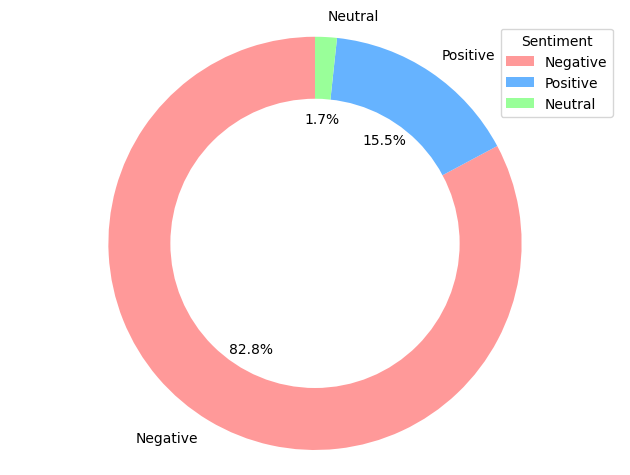

In [ ]:
labels = tp.index
sizes = tp['Percentage']
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.legend(title='Sentiment')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

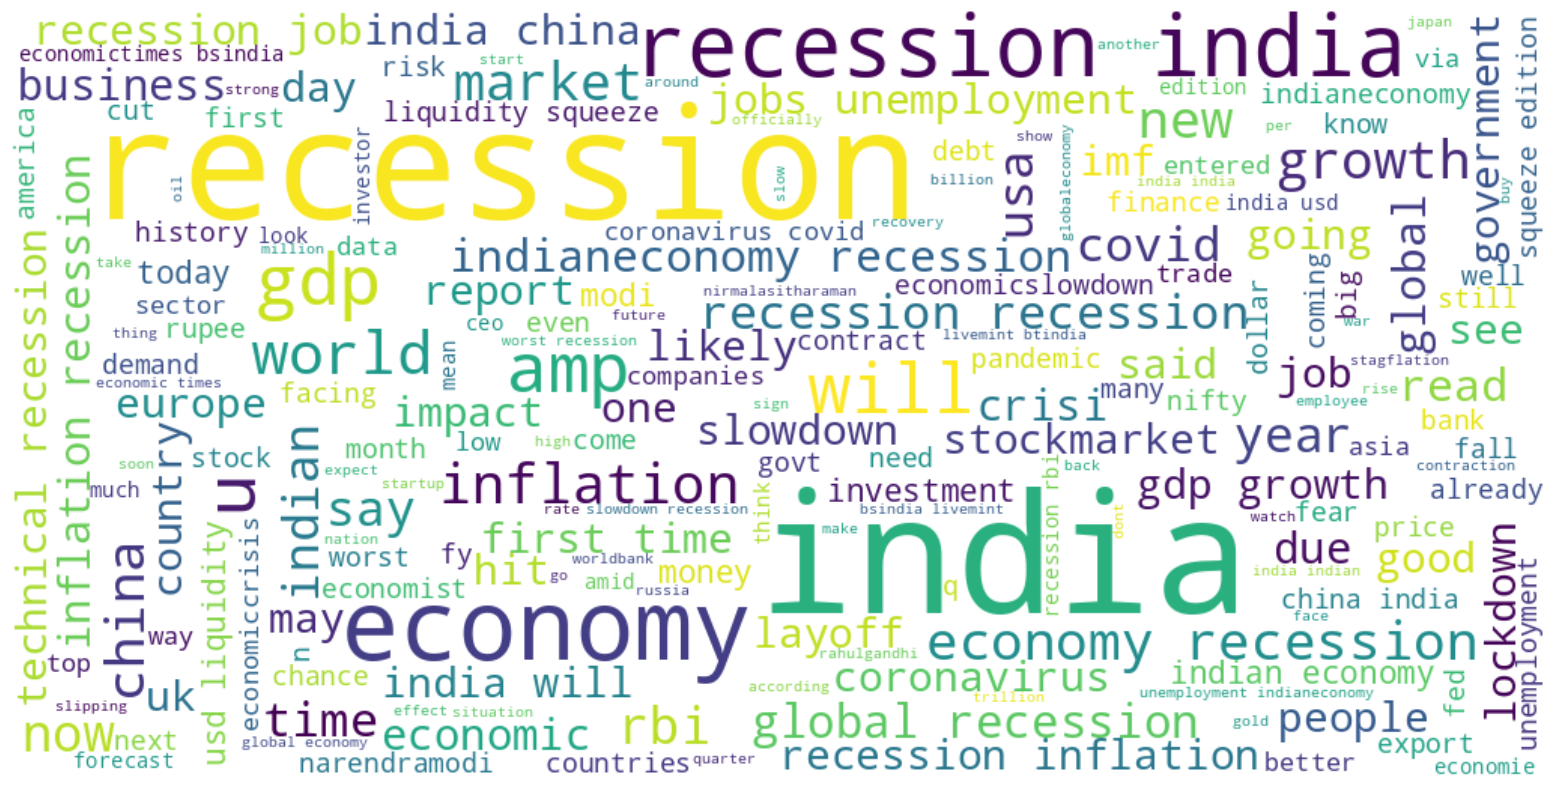

In [ ]:
all_tweets = " ".join(tweet for tweet in df['content'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

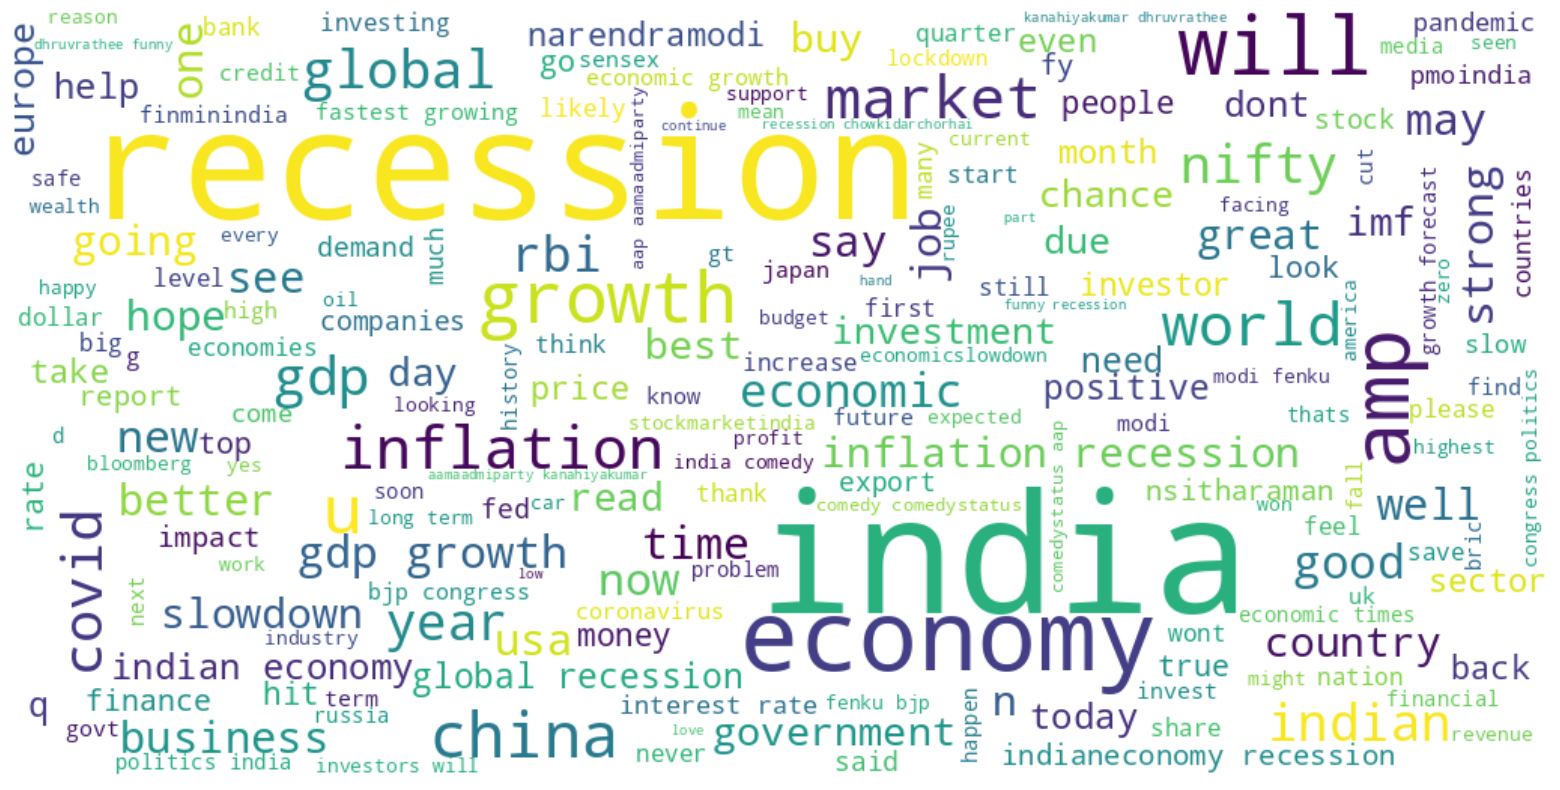

In [ ]:
all_positive_tweets = " ".join(tweet for tweet in df[df['Sentiment'] == 'Positive']['content'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_positive_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

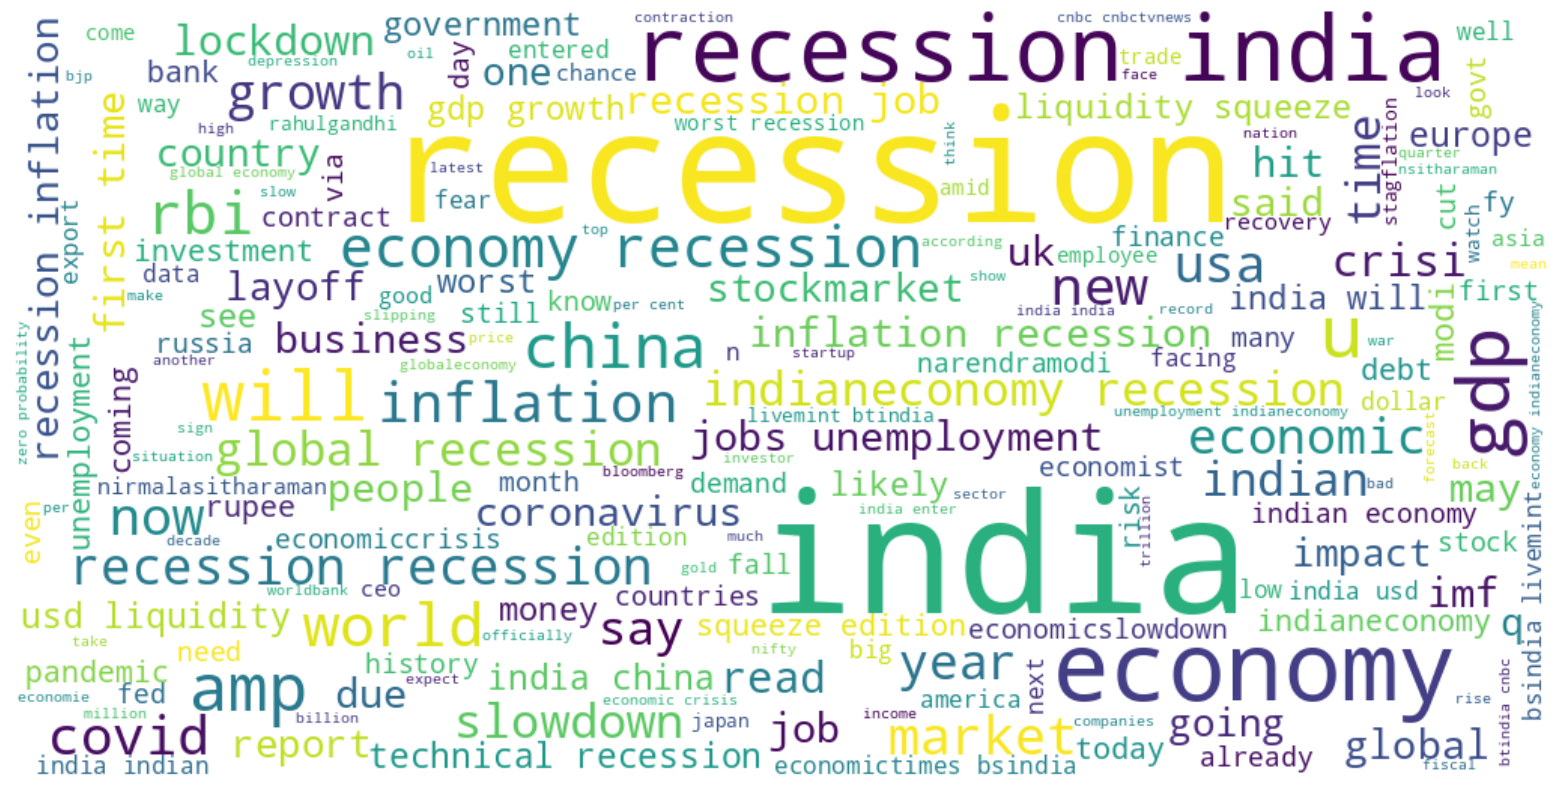

In [ ]:
all_negative_tweets = " ".join(tweet for tweet in df[df['Sentiment'] == 'Negative']['content'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_negative_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

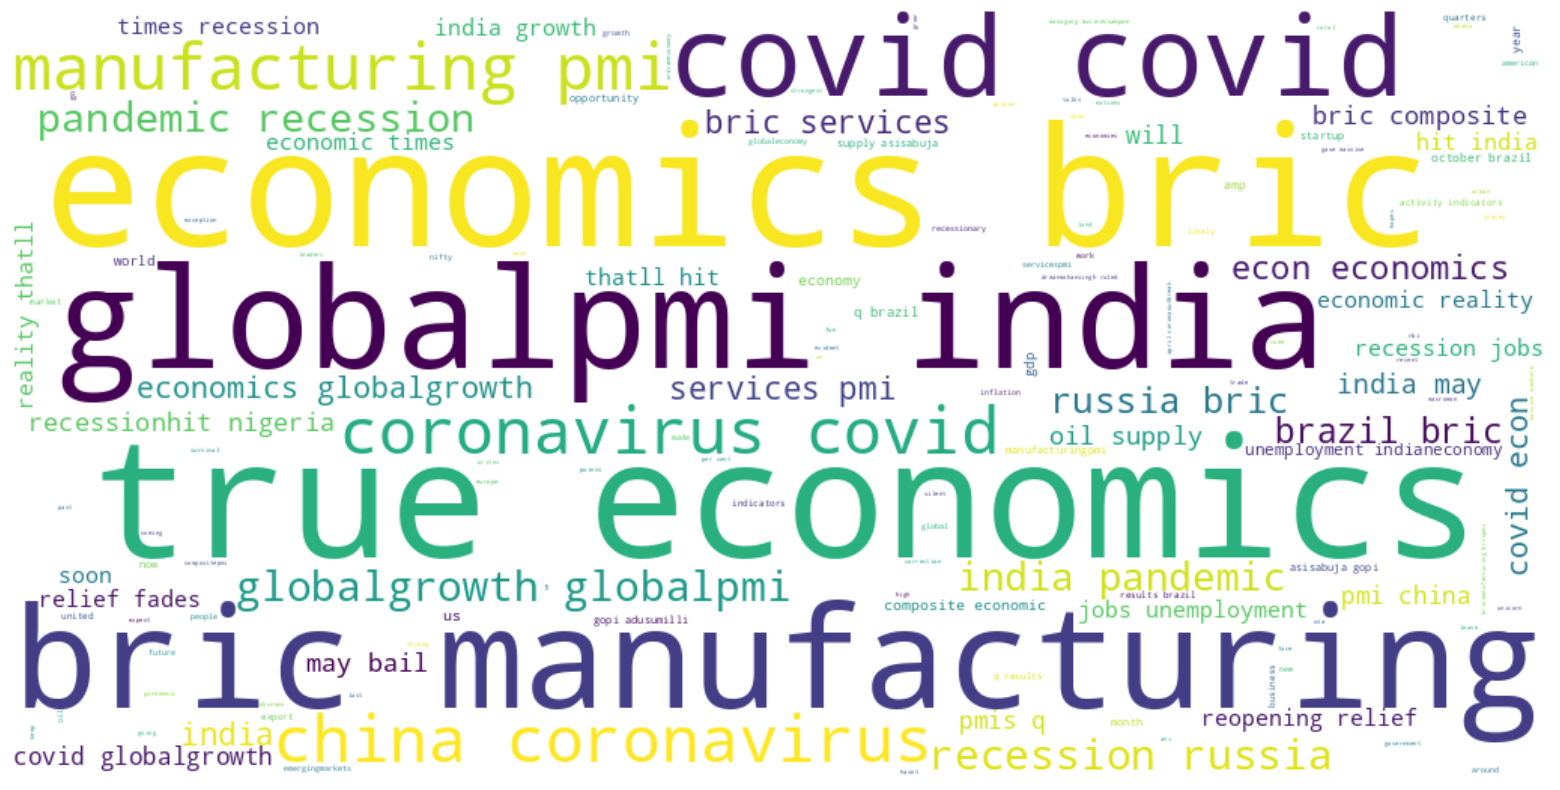

In [ ]:
all_neutral_tweets = " ".join(tweet for tweet in df[df['Sentiment'] == 'Neutral']['content'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_negative_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["label"] = ord_enc.fit_transform(df[["Sentiment"]])
df[["Sentiment", "label"]].tail(3)

Sentiment  label
5173  Negative    0.0
5174  Positive    2.0
5175  Negative    0.0

In [ ]:
df = df[['content','label']]
df

content  label
0      elonmusk begins hiring for twitter  after fir...    0.0
1     global recession      india           \nglobal...    0.0
2     will global recession impact india or not rece...    0.0
3     is recession in india coming soon\n\nwant to k...    0.0
4     a report by realestate data collation amp rese...    0.0
...                                                 ...    ...
5171  india beats recession blues back on fdi radar ...    0.0
5172  one lakh indian will return home to india in n...    0.0
5173  puneet doubts that any economy bric or not is ...    0.0
5174  wow so many guys who did their ms in us are ba...    2.0
5175  indians abandoning their cars at dubai airport...    0.0

[5176 rows x 2 columns]

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Example DataFrame with a 'content' column containing text data
df = pd.DataFrame(df['content'])

# Define a function to remove stop words from a string
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the function to the 'content' column of the DataFrame
df['content'] = df['content'].apply(remove_stop_words)

print(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                content
0     elonmusk begins hiring twitter firing nearly e...
1     global recession india global recession global...
2     global recession impact india recession usa la...
3     recession india coming soon want know read art...
4     report realestate data collation amp research ...
...                                                 ...
5171  india beats recession blues back fdi radar rec...
5172  one lakh indian return home india next one yea...
5173  puneet doubts economy bric insulated recession...
5174  wow many guys ms us back india searching jobs ...
5175  indians abandoning cars dubai airport recessio...

[5176 rows x 1 columns]


In [ ]:
print(df)

                                                content
0     elonmusk begins hiring twitter firing nearly e...
1     global recession india global recession global...
2     global recession impact india recession usa la...
3     recession india coming soon want know read art...
4     report realestate data collation amp research ...
...                                                 ...
5171  india beats recession blues back fdi radar rec...
5172  one lakh indian return home india next one yea...
5173  puneet doubts economy bric insulated recession...
5174  wow many guys ms us back india searching jobs ...
5175  indians abandoning cars dubai airport recessio...

[5176 rows x 1 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Example DataFrame with a 'content' column containing text data
df = pd.DataFrame(df['content'])

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the 'content' column of the DataFrame
vectorizer.fit(df['content'])

# Transform the 'content' column of the DataFrame into a bag-of-words matrix
bow_matrix = vectorizer.transform(df['content'])

print(bow_matrix)


  (0, 450)	1
  (0, 453)	1
  (0, 1184)	1
  (0, 3879)	2
  (0, 3909)	1
  (0, 4587)	1
  (0, 4592)	1
  (0, 4898)	1
  (0, 5662)	2
  (0, 5812)	1
  (0, 6086)	1
  (0, 6711)	1
  (0, 7208)	1
  (0, 7209)	1
  (0, 7327)	1
  (0, 8214)	1
  (0, 8512)	1
  (0, 8623)	1
  (0, 9437)	1
  (0, 10269)	1
  (0, 10632)	1
  (0, 13058)	1
  (0, 13889)	1
  (1, 5107)	2
  (1, 5133)	1
  :	:
  (5173, 6086)	1
  (5173, 6388)	1
  (5173, 9939)	1
  (5173, 10269)	1
  (5173, 10505)	1
  (5173, 13956)	1
  (5174, 981)	1
  (5174, 5383)	1
  (5174, 6086)	1
  (5174, 6734)	1
  (5174, 7698)	1
  (5174, 8299)	1
  (5174, 10269)	1
  (5174, 11124)	1
  (5174, 13311)	1
  (5174, 13946)	1
  (5175, 35)	1
  (5175, 36)	1
  (5175, 334)	1
  (5175, 1888)	1
  (5175, 3624)	1
  (5175, 6086)	1
  (5175, 6193)	2
  (5175, 10269)	1
  (5175, 12755)	1


In [ ]:
bow_df = pd.DataFrame.sparse.from_spmatrix(bow_matrix, columns=vectorizer.get_feature_names_out())
print(bow_df)

      aa  aaa  aaarating  aache  aadarsh  aag  aagaye  aaj  aajkal  aajtak  \
0      0    0          0      0        0    0       0    0       0       0   
1      0    0          0      0        0    0       0    0       0       0   
2      0    0          0      0        0    0       0    0       0       0   
3      0    0          0      0        0    0       0    0       0       0   
4      0    0          0      0        0    0       0    0       0       0   
...   ..  ...        ...    ...      ...  ...     ...  ...     ...     ...   
5171   0    0          0      0        0    0       0    0       0       0   
5172   0    0          0      0        0    0       0    0       0       0   
5173   0    0          0      0        0    0       0    0       0       0   
5174   0    0          0      0        0    0       0    0       0       0   
5175   0    0          0      0        0    0       0    0       0       0   

      ...  zombies  zone  zones  zoobear  zoom  zooms  zro  zub

In [ ]:
import re

def preprocess_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions
    text = re.sub(r'@\w+', '', text)
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    return text

In [ ]:
df['content'] = df['content'].apply(preprocess_text)
print(df)

                                                content
0     elonmusk begins hiring twitter firing nearly e...
1     global recession india global recession global...
2     global recession impact india recession usa la...
3     recession india coming soon want know read art...
4     report realestate data collation amp research ...
...                                                 ...
5171  india beats recession blues back fdi radar rec...
5172  one lakh indian return home india next one yea...
5173  puneet doubts economy bric insulated recession...
5174  wow many guys ms us back india searching jobs ...
5175  indians abandoning cars dubai airport recessio...

[5176 rows x 1 columns]


In [ ]:
print(df)

                                                content
0     elonmusk begin hiring twitter firing nearly em...
1     global recession india global recession global...
2     global recession impact india recession usa la...
3     recession india coming soon want know read art...
4     report realestate data collation amp research ...
...                                                 ...
5171  india beat recession blue back fdi radar reces...
5172  one lakh indian return home india next one yea...
5173  puneet doubt economy bric insulated recession ...
5174  wow many guy m u back india searching job rece...
5175  indian abandoning car dubai airport recession ...

[5176 rows x 1 columns]


In [ ]:
for index, row in df['content'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg > pos:
    df.loc[index, 'Sentiment'] = 'Negative'
  elif pos > neg:
    df.loc[index, 'Sentiment'] = 'Positive'
  else:
    df.loc[index, 'Sentiment'] = 'Neutral'

df

content Sentiment
0     elonmusk begins hiring twitter firing nearly e...  Negative
1     global recession india global recession global...  Negative
2     global recession impact india recession usa la...  Negative
3     recession india coming soon want know read art...  Negative
4     report realestate data collation amp research ...  Negative
...                                                 ...       ...
5171  india beats recession blues back fdi radar rec...  Negative
5172  one lakh indian return home india next one yea...  Negative
5173  puneet doubts economy bric insulated recession...  Negative
5174  wow many guys ms us back india searching jobs ...  Positive
5175  indians abandoning cars dubai airport recessio...  Negative

[5176 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["label"] = ord_enc.fit_transform(df[["Sentiment"]])
df[["Sentiment", "label"]].tail(3)

Sentiment  label
5173  Negative    0.0
5174  Positive    2.0
5175  Negative    0.0

In [ ]:
tokenized_tweet = df['content'].apply(lambda x: x.split())
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['content']  = tokenized_tweet
print(df)

                                                content Sentiment  label
0     elonmusk begin hire twitter fire nearli employ...  Negative    0.0
1     global recess india global recess globalrecess...  Negative    0.0
2     global recess impact india recess usa layoff r...  Negative    0.0
3     recess india come soon want know read articl r...  Negative    0.0
4     report realest data collat amp research firm c...  Negative    0.0
...                                                 ...       ...    ...
5171  india beat recess blue back fdi radar recess i...  Negative    0.0
5172  one lakh indian return home india next one yea...  Negative    0.0
5173  puneet doubt economi bric insul recess report ...  Negative    0.0
5174    wow mani guy ms us back india search job recess  Positive    2.0
5175  indian abandon car dubai airport recess tighte...  Negative    0.0

[5176 rows x 3 columns]


In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')


# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to convert the WordNet part of speech tags to their corresponding nltk tags
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# apply lemmatization for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['content'] = tokenized_tweet
print(df)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


                                                content Sentiment
0     e l o n m u s k   b e g i n   h i r e   t w i ...  Negative
1     g l o b a l   r e c e s s   i n d i a   g l o ...  Negative
2     g l o b a l   r e c e s s   i m p a c t   i n ...  Negative
3     r e c e s s   i n d i a   c o m e   s o o n   ...  Negative
4     r e p o r t   r e a l e s t   d a t a   c o l ...  Negative
...                                                 ...       ...
5171  i n d i a   b e a t   r e c e s s   b l u e   ...  Negative
5172  o n e   l a k h   i n d i a n   r e t u r n   ...  Negative
5173  p u n e e t   d o u b t   e c o n o m i   b r ...  Negative
5174  w o w   m a n i   g u y   m   u   b a c k   i ...  Positive
5175  i n d i a n   a b a n d o n   c a r   d u b a ...  Negative

[5176 rows x 2 columns]


In [ ]:
import pandas as pd
import nltk
from gensim import corpora, models
import gensim
dictionary = corpora.Dictionary(tokenized_tweet.str.split())

# Filter out words that appear in less than 10 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create a Gensim corpus
corpus = [dictionary.doc2bow(tweet.split()) for tweet in tokenized_tweet]

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

# Print the topics identified by the model
for topic in lda_model.print_topics():
    print(topic)

(0, '0.467*"j" + 0.255*"z" + 0.181*"x" + 0.097*"q"')
(1, '0.530*"j" + 0.413*"x" + 0.039*"q" + 0.018*"z"')
(2, '0.760*"q" + 0.162*"j" + 0.076*"z" + 0.002*"x"')
(3, '0.952*"j" + 0.027*"x" + 0.013*"z" + 0.008*"q"')
(4, '0.816*"z" + 0.124*"j" + 0.057*"x" + 0.003*"q"')
(5, '0.836*"j" + 0.121*"q" + 0.023*"x" + 0.020*"z"')
(6, '0.383*"j" + 0.347*"x" + 0.252*"z" + 0.017*"q"')
(7, '0.956*"x" + 0.022*"z" + 0.016*"j" + 0.006*"q"')
(8, '0.418*"z" + 0.357*"q" + 0.204*"x" + 0.021*"j"')
(9, '0.509*"q" + 0.434*"x" + 0.033*"z" + 0.024*"j"')


In [ ]:
import pandas as pd
import nltk
from gensim import corpora, models

# Load the dataset


# Tokenize the tweets
tokenized_tweet = df['content'].apply(lambda x: nltk.word_tokenize(x.lower()))

# Filter out stopwords and non-alphabetic tokens
stopwords = nltk.corpus.stopwords.words('english')
tokenized_tweet = tokenized_tweet.apply(lambda x: [token for token in x if token.isalpha() and token not in stopwords])

# Lemmatize the tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# Create a Gensim dictionary
dictionary = corpora.Dictionary(tokenized_tweet)

# Filter out words that appear in less than 5 documents, or more than 90% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.9)

# Create a Gensim corpus
corpus = [dictionary.doc2bow(tweet) for tweet in tokenized_tweet]

# Train the LDA model with 5 topics
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Print the topics identified by the model
for topic in lda_model.print_topics():
    print(topic)


(0, '0.035*"economi" + 0.029*"job" + 0.016*"gdp" + 0.013*"econom" + 0.012*"indianeconomi" + 0.011*"growth" + 0.011*"unemploy" + 0.010*"covid" + 0.010*"indian" + 0.008*"world"')
(1, '0.019*"global" + 0.018*"econom" + 0.016*"china" + 0.014*"amp" + 0.014*"economi" + 0.012*"world" + 0.011*"like" + 0.010*"bric" + 0.010*"brazil" + 0.009*"tradewar"')
(2, '0.030*"china" + 0.021*"u" + 0.013*"economi" + 0.012*"edit" + 0.012*"amp" + 0.012*"news" + 0.011*"inflat" + 0.009*"car" + 0.009*"market" + 0.009*"like"')
(3, '0.019*"economi" + 0.014*"time" + 0.013*"first" + 0.012*"rbi" + 0.011*"modi" + 0.011*"gdp" + 0.010*"amp" + 0.009*"indian" + 0.009*"rt" + 0.009*"enter"')
(4, '0.048*"economi" + 0.017*"gdp" + 0.017*"growth" + 0.014*"global" + 0.010*"china" + 0.010*"slowdown" + 0.009*"inflat" + 0.008*"world" + 0.008*"u" + 0.008*"rate"')


In [ ]:
!pip install pyLDAvis
!pip install gensim
!pip install coherence-model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 33.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement coherence-model (from versions: none)
ERROR: No matching 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.34377824386079964


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


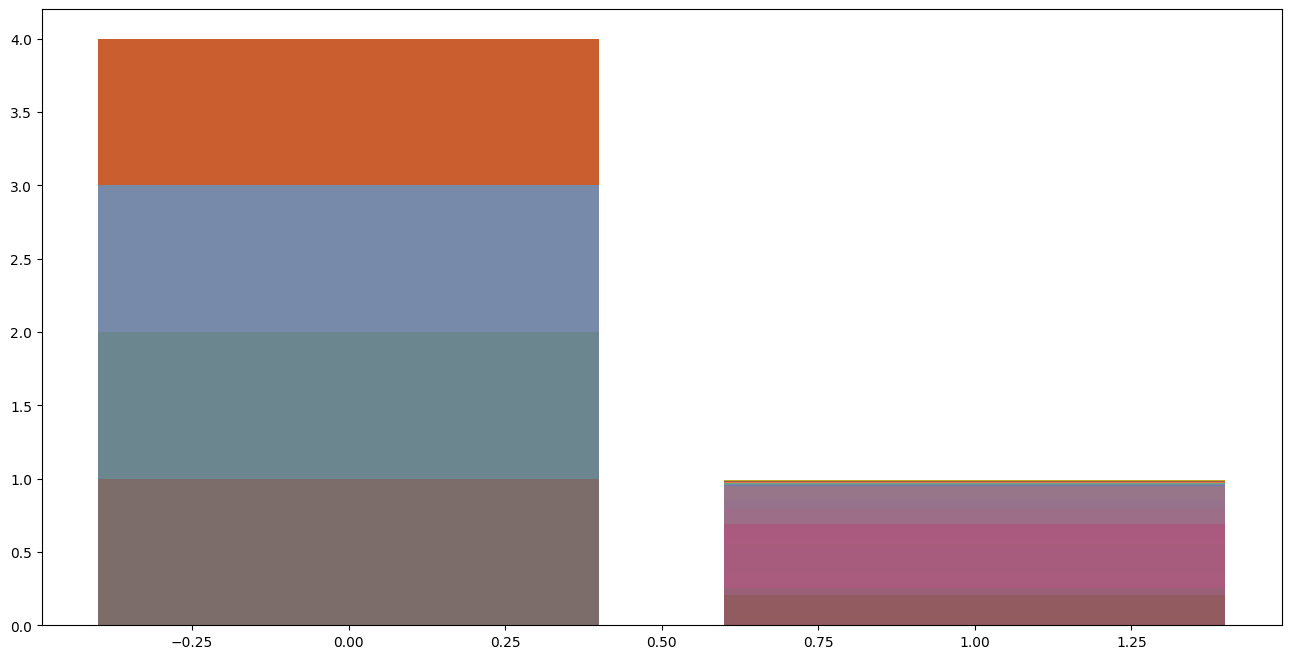

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

import pyLDAvis

# Preprocessing
stop_words = stopwords.words('english')
documents = df['content'].values.tolist()

processed_docs = []
for doc in documents:
    # Remove special characters and lowercase the text
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    # Tokenize the document
    tokens = nltk.word_tokenize(doc)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Add tokens to list
    processed_docs.append(tokens)

# Create a dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,
                     random_state=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# Plot the topic distribution for each document
plt.figure(figsize=(16, 8))
for i, doc in enumerate(corpus):
    topic_distribution = np.array(lda_model.get_document_topics(doc)[0]).flatten()
    plt.bar(range(len(topic_distribution)), topic_distribution, alpha=0.5)
plt.show()


In [ ]:
# Save the LDA model
lda_model.save('lda_model')

# Load the LDA model
lda_model = LdaModel.load('lda_model')

# Print the topics
for topic in lda_model.print_topics():
    print(topic)


(0, '0.064*"recess" + 0.056*"india" + 0.025*"economi" + 0.010*"china" + 0.009*"us" + 0.005*"world" + 0.005*"amp" + 0.005*"uk" + 0.005*"like" + 0.005*"tradewar"')
(1, '0.021*"india" + 0.020*"recess" + 0.018*"job" + 0.012*"employ" + 0.009*"spain" + 0.009*"china" + 0.008*"amp" + 0.007*"tough" + 0.006*"prospect" + 0.005*"usa"')
(2, '0.041*"recess" + 0.036*"india" + 0.008*"narendramodi" + 0.007*"indian" + 0.006*"pmoindia" + 0.006*"get" + 0.005*"modi" + 0.004*"rahulgandhi" + 0.004*"nsitharaman" + 0.004*"job"')
(3, '0.076*"recess" + 0.073*"india" + 0.028*"economi" + 0.021*"gdp" + 0.015*"growth" + 0.013*"econom" + 0.011*"china" + 0.011*"covid" + 0.010*"job" + 0.009*"indianeconomi"')
(4, '0.077*"recess" + 0.070*"india" + 0.010*"economi" + 0.010*"global" + 0.009*"amp" + 0.009*"inflat" + 0.008*"us" + 0.008*"market" + 0.006*"edit" + 0.005*"bank"')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt



# Preprocessing
stop_words = stopwords.words('english')
documents = df['content'].values.tolist()

processed_docs = []
for doc in documents:
    # Remove special characters and lowercase the text
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    # Tokenize the document
    tokens = nltk.word_tokenize(doc)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Add tokens to list
    processed_docs.append(tokens)

# Create a dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,
                     random_state=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

# Find the most representative document for each topic
most_representative_docs = {}
for i in range(lda_model.num_topics):
    topic_docs = []
    for j, doc in enumerate(corpus):
        topic_distribution = lda_model.get_document_topics(doc)[0]
        if topic_distribution[0] == i:
            topic_docs.append((j, topic_distribution[1]))
    most_representative_doc = max(topic_docs, key=lambda x: x[1])
    most_representative_docs[i] = documents[most_representative_doc[0]]

# Print the most representative document for each topic
for topic, doc in most_representative_docs.items():
    print("Topic", topic, ":", doc)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.34377824386079964
Topic 0 : uk ink traded japan make nearli british export tariff free vietnam also mull pact india becom ndlargest fdi sourc uk eu brexittalk near deadend uk busi asia excl china hold key lift worst recess yr
Topic 1 : samirsinh bloomberg clfigueredo hanneswagn dlacalleia patcriolo jbreitfeld hembishwakarma uttamdev davidskryp economiccrisi econecho sanctionsampwar wth russia r cost westu eco alreadybychinaampmor way slowdu debtcrisi india meticul handlng econmi hs kept good whni slippng recessionris worldlead wth zro chanc ofrecessn
Topic 2 : tssiatisa dineshwadera gstcouncil nsitharaman finminindia cbicindia askgstgoi askgstech humour badey mask pehney thaiy bhaiyaa aapney bhi ek honhaar ke ab mukhotaa utter gaya sumpathi progress dhaikh lee ab recess bhi dhaikho aag main jal kar hi sona kundan bantaa hai till jyotishi kah raha tha extrem sorri harsh word
Topic 3 : usa sanction threat g oil price cap noncompli nonstart nong china india russia top 

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

# Preprocessing
stop_words = stopwords.words('english')
documents = df['content'].values.tolist()

processed_docs = []
for doc in documents:
    # Remove special characters and lowercase the text
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    # Tokenize the document
    tokens = nltk.word_tokenize(doc)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Add tokens to list
    processed_docs.append(tokens)

# Create a dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,
                     random_state=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

# Find the most representative document for each topic
most_representative_docs = {}
for i in range(lda_model.num_topics):
    topic_docs = []
    for j, doc in enumerate(corpus):
        topic_distribution = lda_model.get_document_topics(doc)[0]
        if topic_distribution[0] == i:
            topic_docs.append((j, topic_distribution[1]))
    most_representative_doc = max(topic_docs, key=lambda x: x[1])
    most_representative_docs[i] = documents[most_representative_doc[0]]

# Print the most representative document for each topic
for topic, doc in most_representative_docs.items():
    print(f"Topic {topic}: {doc}\n")
    top_words = lda_model.show_topic(topic)
    print("Top words:")
    for word, prob in top_words:
        print(f"\t{word}: {prob:.3f}")
    print("\n")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.34377824386079964
Topic 0: uk ink traded japan make nearli british export tariff free vietnam also mull pact india becom ndlargest fdi sourc uk eu brexittalk near deadend uk busi asia excl china hold key lift worst recess yr

Top words:
	recess: 0.064
	india: 0.056
	economi: 0.025
	china: 0.010
	us: 0.009
	world: 0.005
	amp: 0.005
	uk: 0.005
	like: 0.005
	tradewar: 0.005


Topic 1: samirsinh bloomberg clfigueredo hanneswagn dlacalleia patcriolo jbreitfeld hembishwakarma uttamdev davidskryp economiccrisi econecho sanctionsampwar wth russia r cost westu eco alreadybychinaampmor way slowdu debtcrisi india meticul handlng econmi hs kept good whni slippng recessionris worldlead wth zro chanc ofrecessn

Top words:
	india: 0.021
	recess: 0.020
	job: 0.018
	employ: 0.012
	spain: 0.009
	china: 0.009
	amp: 0.008
	tough: 0.007
	prospect: 0.006
	usa: 0.005


Topic 2: tssiatisa dineshwadera gstcouncil nsitharaman finminindia cbicindia askgstgoi askgstech humour badey mask pehney

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# Load the data and preprocess

stop_words = stopwords.words('english')
df = [[word for word in doc if word not in stop_words] for doc in df]

# Create a dictionary from the preprocessed data
dictionary = Dictionary(df)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in df]

# Try different values of k
for k in range(2, 8):
    # Train the model with LDA algorithm
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)

    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Coherence Score for {k} topics: {coherence_lda:.3f}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.240
Coherence Score for 3 topics: 0.240
Coherence Score for 4 topics: 0.240
Coherence Score for 5 topics: 0.240
Coherence Score for 6 topics: 0.240
Coherence Score for 7 topics: 0.240


In [ ]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Load the data
df = pd.read_csv('recession_2023_data.csv')

# Preprocess the data
def preprocess(text):
  
    # Tokenize the text
    tokens = simple_preprocess(text)
    # Remove stop words
    stop_words = gensim.parsing.preprocessing.STOPWORDS
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply the preprocessing function to the content column
df['tokens'] = df['content'].apply(preprocess)

# Create a dictionary from the tokens
dictionary = Dictionary(df['tokens'])

# Filter out tokens that appear in less than 10 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Convert the corpus into bag-of-words format using the dictionary
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Define a function to calculate the coherence score for a given number of topics
def calculate_coherence_score(corpus, dictionary, num_topics):
    # Train the LDA model
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=df['tokens'],
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    return coherence_score

# Calculate the coherence score for a range of topic numbers
for num_topics in range(2, 8):
    coherence_score = calculate_coherence_score(corpus, dictionary, num_topics)
    print(f"Coherence Score for {num_topics} topics: {coherence_score:.3f}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score for 2 topics: 0.287
Coherence Score for 3 topics: 0.328
Coherence Score for 4 topics: 0.358
Coherence Score for 5 topics: 0.351
Coherence Score for 6 topics: 0.332
Coherence Score for 7 topics: 0.371


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import re

# load the dataset
df = pd.read_csv('recession_2023_data.csv')

# preprocess the data
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    # remove mentions
    text = re.sub(r'@\w+', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # convert to lowercase
    text = text.lower()
    # remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['processed_text'] = df['content'].apply(preprocess_text)

# create a dictionary and corpus
texts = df['processed_text'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# define the number of topics
num_topics = 5

# iterate over different values of alpha and beta
coherence_scores = []
for alpha in [0.01, 0.1, 1]:
    for beta in [0.01, 0.1, 1]:
        # train the LDA model
        lda_model = LdaModel(corpus=corpus,
                             id2word=dictionary,
                             num_topics=num_topics,
                             alpha=alpha,
                             eta=beta,
                             iterations=100,
                             random_state=42)
        # calculate the coherence score
        coherence_model_lda = CoherenceModel(model=lda_model,
                                             texts=texts,
                                             dictionary=dictionary,
                                             coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_scores.append((alpha, beta, coherence_score))

# print the coherence scores for each combination of hyperparameters
for alpha, beta, coherence_score in coherence_scores:
    print(f'Coherence Score for alpha={alpha}, beta={beta}: {coherence_score:.3f}')

# choose the hyperparameters with the highest coherence score
best_alpha, best_beta, best_coherence = max(coherence_scores, key=lambda x: x[2])
print(f'Best alpha={best_alpha}, beta={best_beta}, coherence score={best_coherence:.3f}')

# train the final LDA model


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Coherence Score for alpha=0.01, beta=0.01: 0.375
Coherence Score for alpha=0.01, beta=0.1: 0.370
Coherence Score for alpha=0.01, beta=1: 0.356
Coherence Score for alpha=0.1, beta=0.01: 0.357
Coherence Score for alpha=0.1, beta=0.1: 0.356
Coherence Score for alpha=0.1, beta=1: 0.342
Coherence Score for alpha=1, beta=0.01: 0.373
Coherence Score for alpha=1, beta=0.1: 0.373
Coherence Score for alpha=1, beta=1: 0.382
Best alpha=1, beta=1, coherence score=0.382


In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Convert tweets to list
docs = df['content'].tolist()

# Tokenize and create dictionary
texts = [doc.split() for doc in docs]
dictionary = Dictionary(texts)

# Create corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Set the number of topics
num_topics = 4

# Set hyperparameters
alpha_values = [0.01, 0.1, 1]
beta_values = [0.01, 0.1, 1]

# Initialize coherence scores list
coherence_scores = []

# Iterate over all possible combinations of hyperparameters
for alpha in alpha_values:
    for beta in beta_values:
        lda_model = LdaModel(corpus=corpus,
                             id2word=dictionary,
                             num_topics=num_topics,
                             alpha=alpha,
                             eta=beta,
                             iterations=100,
                             passes=10)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_scores.append((alpha, beta, coherence_lda))
        print(f"Coherence Score for alpha={alpha}, beta={beta}: {coherence_lda}")

# Find the combination with the highest coherence score
best_params = max(coherence_scores, key=lambda x: x[2])
print(f"Best alpha={best_params[0]}, beta={best_params[1]}, coherence score={best_params[2]}")
for topic, doc in most_representative_docs.items():
    print(f"Topic {topic}: {doc}\n")
    top_words = lda_model.show_topic(topic)
    print("Top words:")
    for word, prob in top_words:
        print(f"\t{word}: {prob:.3f}")
    print("\n")2


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score for alpha=0.01, beta=0.01: 0.3195746809934993
Coherence Score for alpha=0.01, beta=0.1: 0.37398591006198245
Coherence Score for alpha=0.01, beta=1: 0.40595805220217274
Coherence Score for alpha=0.1, beta=0.01: 0.33645961105365446
Coherence Score for alpha=0.1, beta=0.1: 0.33362310049401345
Coherence Score for alpha=0.1, beta=1: 0.3671404471167388
Coherence Score for alpha=1, beta=0.01: 0.4146258513335643
Coherence Score for alpha=1, beta=0.1: 0.3585293406838773
Coherence Score for alpha=1, beta=1: 0.4326020988578485
Best alpha=1, beta=1, coherence score=0.4326020988578485


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


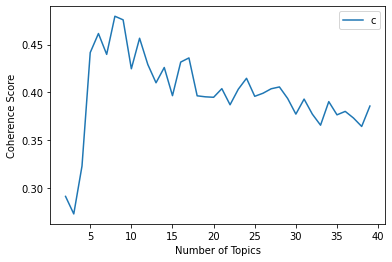

Coherence Score for 2 topics: 0.2913313312486034
Coherence Score for 3 topics: 0.273012779110205
Coherence Score for 4 topics: 0.323029643292196
Coherence Score for 5 topics: 0.44163582823035324
Coherence Score for 6 topics: 0.4615544381606897
Coherence Score for 7 topics: 0.43974592805721013
Coherence Score for 8 topics: 0.4796112281405682
Coherence Score for 9 topics: 0.4758561622758213
Coherence Score for 10 topics: 0.42471708693324145
Coherence Score for 11 topics: 0.45661855202740487
Coherence Score for 12 topics: 0.42920057025046127
Coherence Score for 13 topics: 0.41008035625079803
Coherence Score for 14 topics: 0.4260482835422092
Coherence Score for 15 topics: 0.3965993277565923
Coherence Score for 16 topics: 0.43171664172854834
Coherence Score for 17 topics: 0.43605408153830905
Coherence Score for 18 topics: 0.3964500582574681
Coherence Score for 19 topics: 0.3953994794457792
Coherence Score for 20 topics: 0.39490709896155163
Coherence Score for 21 topics: 0.40391996632058874


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import gensim
import os
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel

# Download stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('recession_2023_data.csv')

# Convert tweets to list
data = df['content'].tolist()

# Remove stopwords
stop_words = stopwords.words('english')
data = [[word for word in doc.lower().split() if word not in stop_words] for doc in data]

# Create dictionary
dictionary = gensim.corpora.Dictionary(data)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in data]

# Find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data, start=2, limit=40, step=1)

# Plot coherence score vs number of topics
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Coherence Score for {} topics: {}".format(m, cv))

# Find the optimal number of topics based on the coherence score
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_num_topics = range(start, limit, step)[optimal_model_index]
optimal_model = model_list[optimal_model_index]
print("Optimal Number of Topics: ", optimal_num_topics)

# Print top words for each topic
topics = optimal_model.show_topics(num_topics=-1, num_words=15, formatted=False)
for i, topic in enumerate(topics):
    print("Topic {}: {}".format(i, [word[0] for word in topic[1]]))


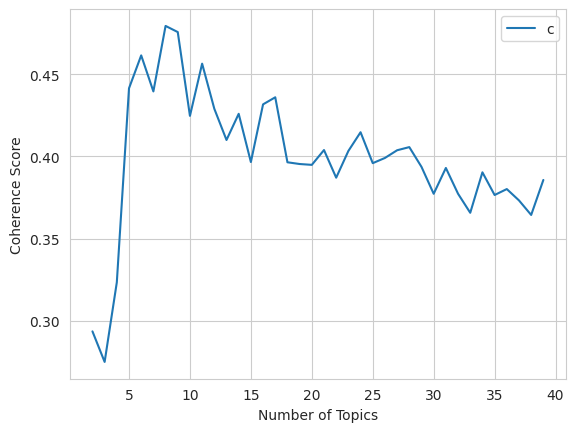

In [ ]:
import matplotlib.pyplot as plt

# ...

# Plot coherence score vs number of topics
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')

# Save the plot as a PNG file
plt.savefig('coherence_plot.png')

# Display the plot
plt.show()




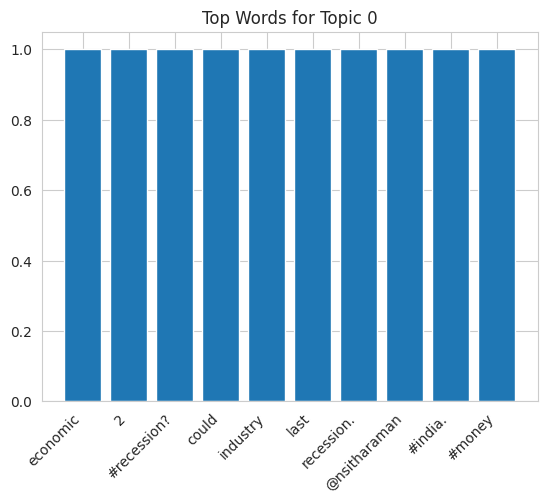

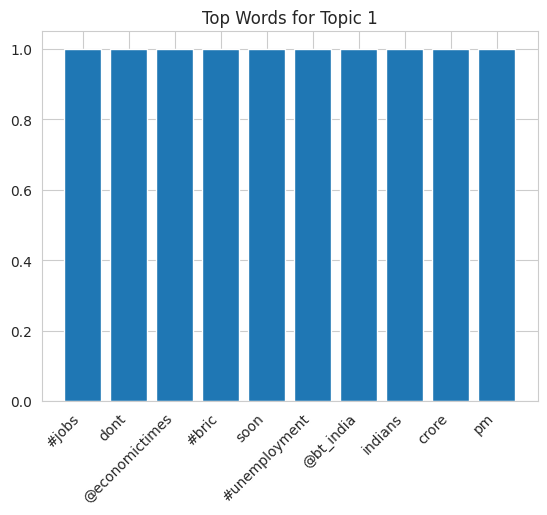

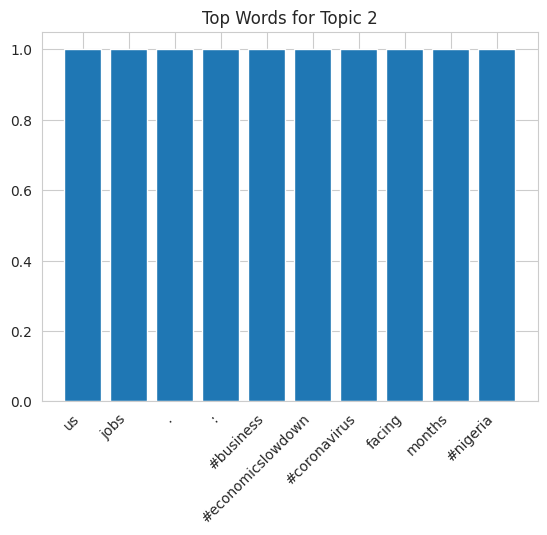

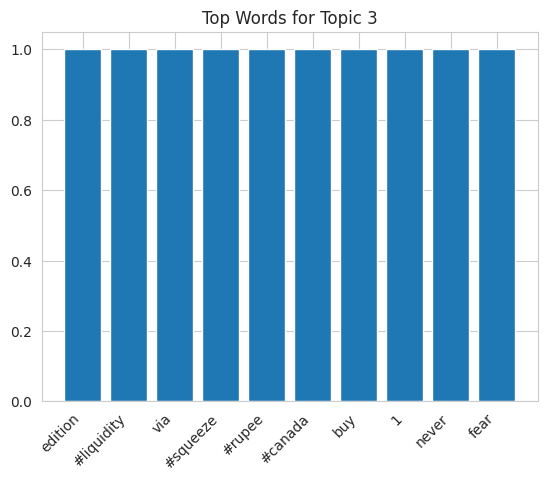

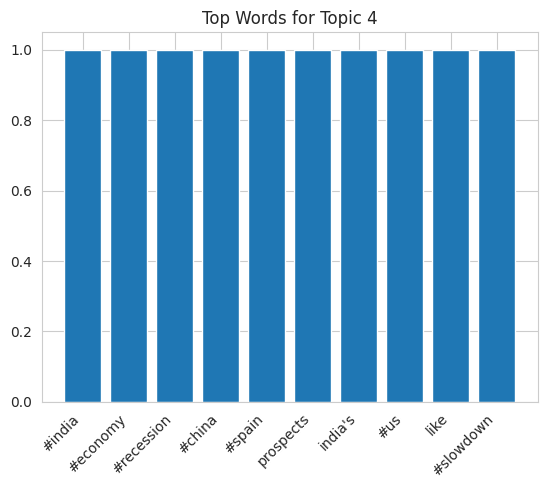

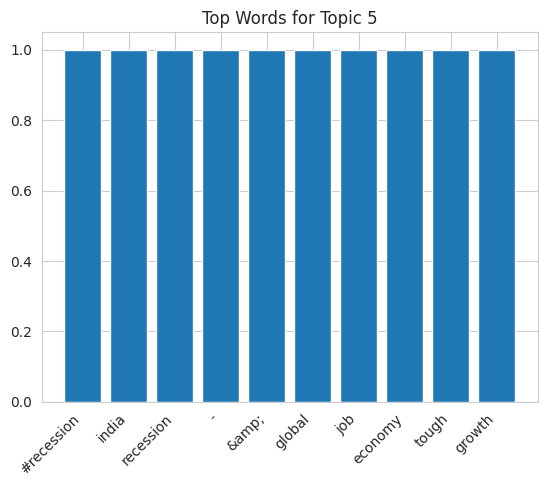

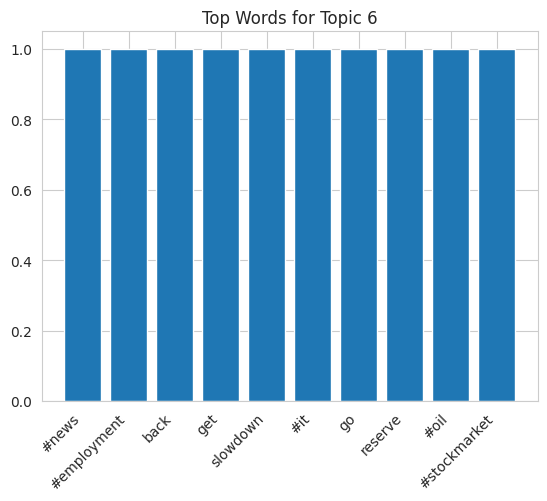

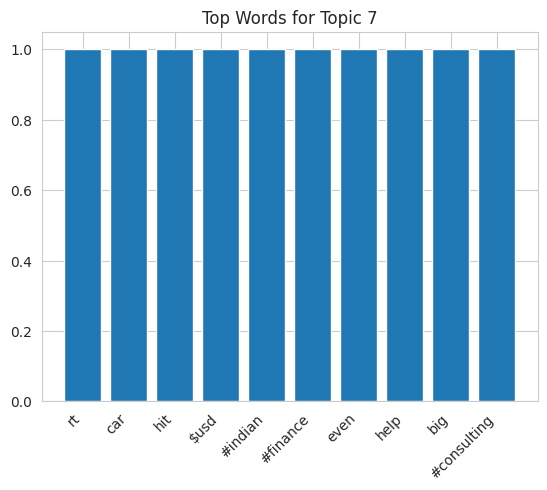

In [ ]:
from collections import Counter

# Define function to plot word frequencies
def plot_word_freqs(words, title):
    word_counts = Counter(words)
    common_words = [word[0] for word in word_counts.most_common(10)]
    common_counts = [word_counts[word] for word in common_words]
    plt.bar(common_words, common_counts)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # rotate x-axis labels
    plt.show()

# Get the top 10 most frequent words in each topic
for i, topic in enumerate(topics):
    words = [word[0] for word in topic[1]]
    plot_word_freqs(words, "Top Words for Topic {}".format(i))


In [ ]:
# Identify dominant topics in each tweet
dominant_topics = []
for i, doc in enumerate(corpus):
    topic_probs = optimal_model.get_document_topics(doc)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    dominant_topics.append(dominant_topic)

# Add dominant topic to dataframe
df['dominant_topic'] = dominant_topics

# Print the number of tweets per dominant topic
topic_counts = df['dominant_topic'].value_counts().sort_index()
for topic, count in topic_counts.items():
    print("Topic {}: {} tweets".format(topic, count))


Topic 0: 32 tweets
Topic 1: 140 tweets
Topic 2: 56 tweets
Topic 3: 47 tweets
Topic 4: 1009 tweets
Topic 5: 3804 tweets
Topic 6: 74 tweets
Topic 7: 14 tweets


In [ ]:
print(df.head(5)) 

                        date                   id  \
0  2022-11-30 04:17:49+00:00  1597807084934172672   
1  2022-11-30 02:48:10+00:00  1597784522728558592   
2  2022-11-29 17:21:57+00:00  1597642029479038976   
3  2022-11-29 11:40:40+00:00  1597556142213070850   
4  2022-11-29 10:12:57+00:00  1597534071202385922   

                                             content         username  \
0  📌 @elonmusk begins hiring for Twitter 2.0 afte...  workflexitweets   
1  Global Recession से दुनिया हुई बेहाल, लेकिन In...        indilinks   
2  Will global recession impact India or not? #re...     BizzBuzzNews   
3  Is Recession In India Coming Soon?\n\nWant to ...  Anubhav74782862   
4  A report by #realestate data collation &amp; r...    indiaoutbound   

   likeCount  retweetCount  dominant_topic  
0          1             1               7  
1          0             0               4  
2          0             0               5  
3          0             0               5  
4          1     

In [ ]:
# Identify dominant topic in each tweet
dominant_topics = []
for doc in corpus:
    # Get the most likely topic for the document
    doc_topics = optimal_model.get_document_topics(doc, minimum_probability=0.0, per_word_topics=False)
    # Sort the topics by their probability in descending order
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    # Append the dominant topic to the list of dominant topics
    dominant_topics.append(doc_topics[0][0])

# Count the number of tweets for each topic
topic_counts = np.bincount(dominant_topics)

# Print the number of tweets for each topic
for i, count in enumerate(topic_counts):
    print("Topic {}: {} tweets".format(i, count))




Topic 0: 32 tweets
Topic 1: 140 tweets
Topic 2: 56 tweets
Topic 3: 47 tweets
Topic 4: 1009 tweets
Topic 5: 3804 tweets
Topic 6: 74 tweets
Topic 7: 14 tweets


In [ ]:
# Print coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Coherence Score for {} topics: {}".format(m, cv))

# Find the optimal number of topics based on the coherence score
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_num_topics = range(start, limit, step)[optimal_model_index]
optimal_model = model_list[optimal_model_index]
print("Optimal Number of Topics: ", optimal_num_topics)


Coherence Score for 2 topics: 0.29344111074252
Coherence Score for 3 topics: 0.274837786254774
Coherence Score for 4 topics: 0.32332585275497017
Coherence Score for 5 topics: 0.44149165525000755
Coherence Score for 6 topics: 0.4615126739941397
Coherence Score for 7 topics: 0.4395691862942563
Coherence Score for 8 topics: 0.479462449077588
Coherence Score for 9 topics: 0.47571937624801613
Coherence Score for 10 topics: 0.4246779856837836
Coherence Score for 11 topics: 0.45647414709692274
Coherence Score for 12 topics: 0.42901899601152843
Coherence Score for 13 topics: 0.40999534281164185
Coherence Score for 14 topics: 0.425939725815449
Coherence Score for 15 topics: 0.3965610823707969
Coherence Score for 16 topics: 0.43169432237288186
Coherence Score for 17 topics: 0.4359967360675689
Coherence Score for 18 topics: 0.3964217846521199
Coherence Score for 19 topics: 0.3953652614465499
Coherence Score for 20 topics: 0.39484792901711063
Coherence Score for 21 topics: 0.40387131393502124
Cohe

In [ ]:
tweets = pd.read_csv("recession_2023_data.csv", header=None, names=["text"])

In [17]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 11.8 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:20: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \s
<ipython-input-69-a93589dc6d79>:20: DeprecationWarning: invalid escape sequence \s
  df['clean_text'] = df['content'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x.lower()))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic 0: Average sentiment score = -0.38
Topic 1: Average sentiment score = -0.40
Topic 2: Average sentiment score = -0.26
Topic 3: Average sentiment score = -0.42
Topic 4: Average sentiment score = -0.20
Topic 5: Average sentiment score = -0.43
Topic 6: Average sentiment score = -0.31
Topic 7: Average sentiment score = -0.34


/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/p

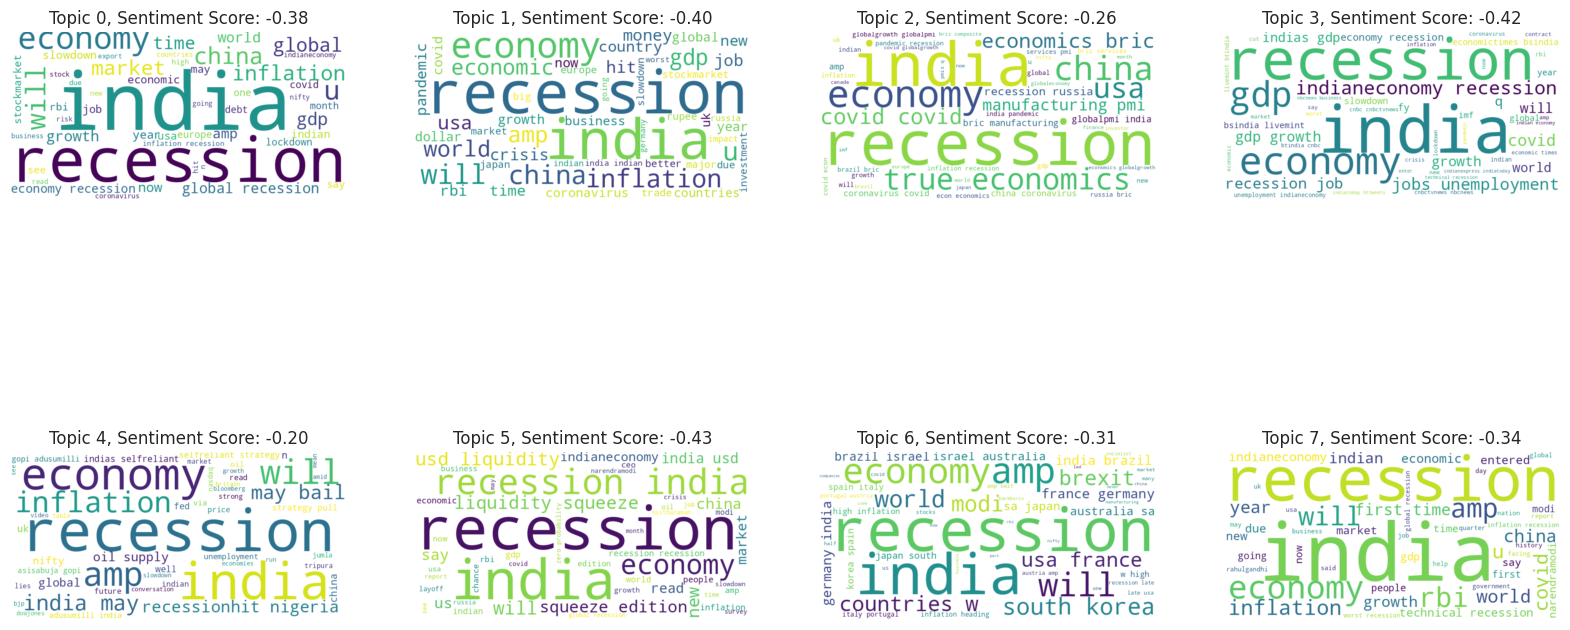

In [ ]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from pprint import pprint
import pyLDAvis.sklearn

# Load the dataset
df = pd.read_csv("recession_2023_data.csv")

# Clean the data
df['clean_text'] = df['content'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x.lower()))
df['tokens'] = df['clean_text'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
ps = PorterStemmer()
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [ps.stem(word) for word in x])

# Perform topic modeling
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
term_freq_matrix = vectorizer.fit_transform(df['stemmed_tokens'])
lda = LatentDirichletAllocation(n_components=8, random_state=42)
lda.fit(term_freq_matrix)

# Visualize the topics
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.sklearn.prepare(lda, term_freq_matrix, vectorizer, mds='tsne', feature_names=vectorizer.get_feature_names())
#pyLDAvis.save_html(vis, 'lda.html')

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Calculate topic sentiment score
topic_sentiments = []
for i in range(8):
    topic_tweets = df.loc[lda.transform(term_freq_matrix).argmax(axis=1) == i]['clean_text']
    if len(topic_tweets) > 0:
        avg_sentiment = topic_tweets.apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    else:
        avg_sentiment = 0
    topic_sentiments.append(avg_sentiment)

# Print the average sentiment score for each topic
for i, avg_sentiment in enumerate(topic_sentiments):
    print("Topic {}: Average sentiment score = {:.2f}".format(i, avg_sentiment))

# Visualize the topics and sentiment scores using a word cloud
# Visualize the topics and sentiment scores using a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(20,10))
axs = axs.flatten()
for i in range(8):
    wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
    wc.generate(' '.join(df.loc[lda.transform(term_freq_matrix).argmax(axis=1) == i]['clean_text']))
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Topic {i}, Sentiment Score: {topic_sentiments[i]:.2f}")

plt.show()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence \s
<>:19: DeprecationWarning: invalid escape sequence \s
<ipython-input-71-6888aa030be6>:19: DeprecationWarning: invalid escape sequence \s
  df['clean_text'] = df['content'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x.lower()))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic 0: Average sentiment score = -0.40
Topic 1: Average sentiment score = -0.37
Topic 2: Average sentiment score = -0.25
Topic 3: Average sentiment score = -0.43
Topic 4: Average sentiment score = -0.24
Topic 5: Average sentiment score = -0.42
Topic 6: Average sentiment score = -0.38
Topic 7: Average sentiment score = -0.34
Topic 8: Average sentiment score = -0.39
Topic 9: Average sentiment score = -0.38
Topic 10: Average sentiment score = -0.27
Topic 11: Average sentiment score = -0.31


/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/p

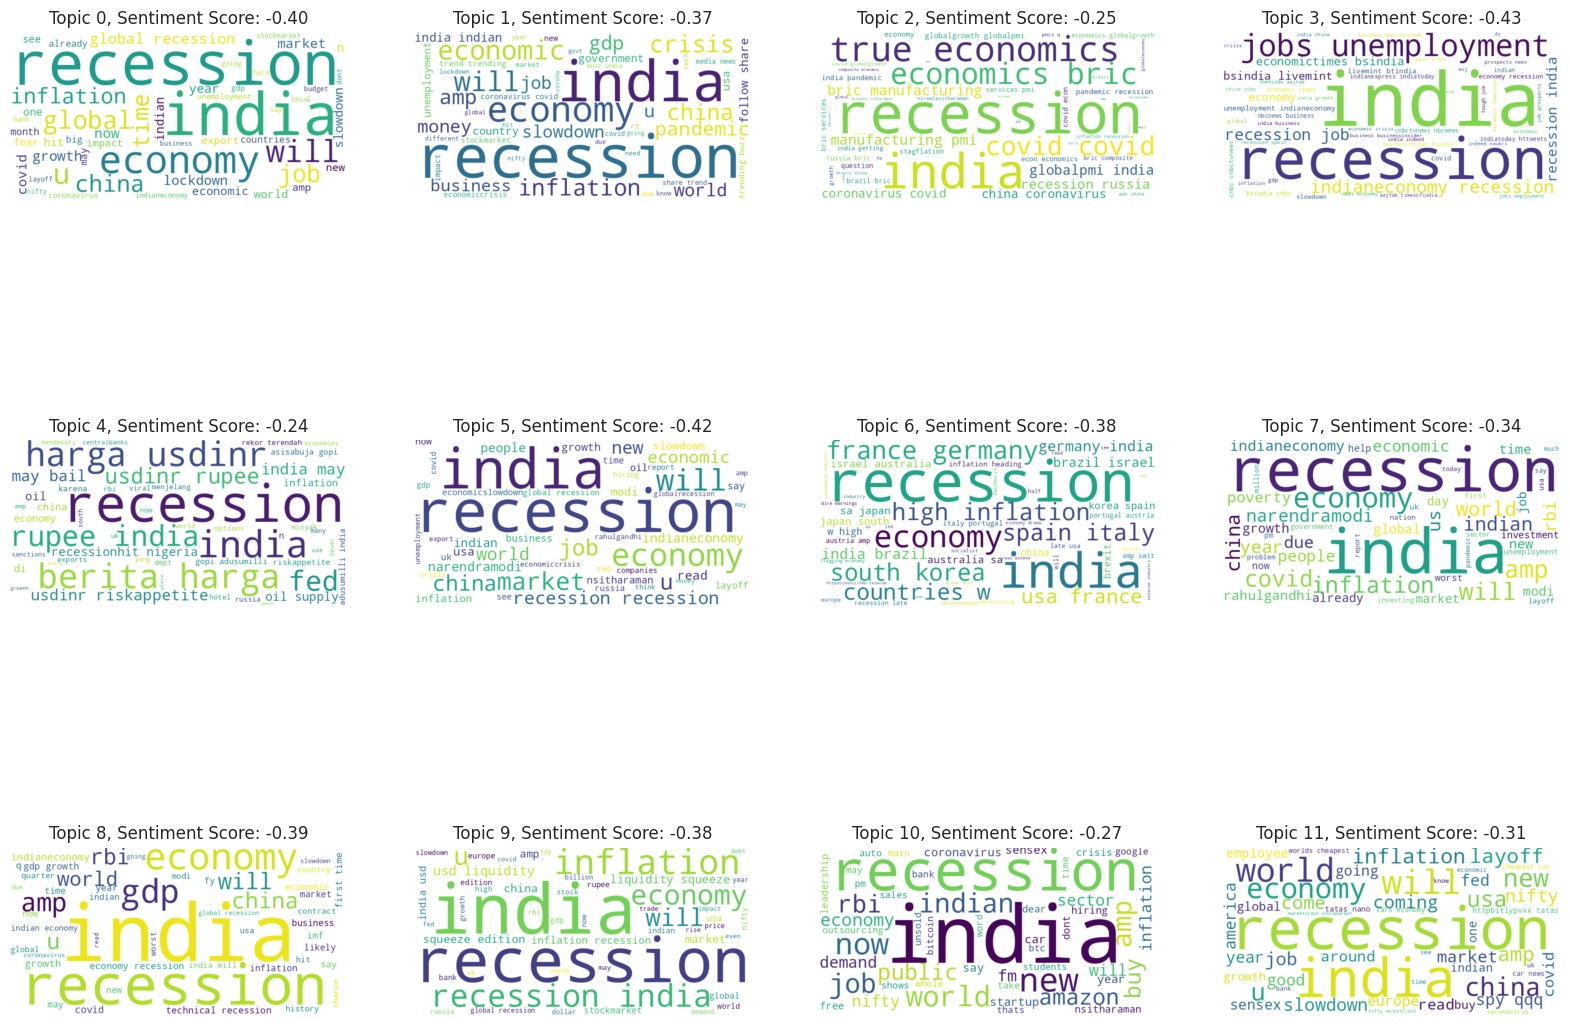

In [ ]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from pprint import pprint
import pyLDAvis.sklearn

nltk.download('punkt')

# Load the dataset
df = pd.read_csv("recession_2023_data.csv")

# Clean the data
df['clean_text'] = df['content'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x.lower()))
df['tokens'] = df['clean_text'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
ps = PorterStemmer()
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [ps.stem(word) for word in x])

# Perform topic modeling
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
term_freq_matrix = vectorizer.fit_transform(df['stemmed_tokens'])
lda = LatentDirichletAllocation(n_components=12, random_state=42, n_jobs=-1)
lda.fit(term_freq_matrix)

# Visualize the topics
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.sklearn.prepare(lda, term_freq_matrix, vectorizer, mds='tsne')
#pyLDAvis.save_html(vis, 'lda.html')

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Calculate topic sentiment score
topic_sentiments = []
for i in range(12):
    topic_tweets = df.loc[lda.transform(term_freq_matrix).argmax(axis=1) == i]['clean_text']
    if len(topic_tweets) > 0:
        avg_sentiment = topic_tweets.apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    else:
        avg_sentiment = 0
    topic_sentiments.append(avg_sentiment)

# Print the average sentiment score for each topic
for i, avg_sentiment in enumerate(topic_sentiments):
    print("Topic {}: Average sentiment score = {:.2f}".format(i, avg_sentiment))

# Visualize the topics and sentiment scores using a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(20,15))
axs = axs.flatten()
for i in range(12):
    wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
    wc.generate(' '.join(df.loc[lda.transform(term_freq_matrix).argmax(axis=1) == i]['clean_text']))
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Topic {i}, Sentiment Score: {topic_sentiments[i]:.2f}")

plt.show()


In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

<ipython-input-18-7a4e67b3993c>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['content'].str.replace('[^a-zA-Z\s]', '').str.lower()


Top 10 words for Topic 0
['unemployment', 'covid', 'growth', 'rbi', 'indias', 'indianeconomy', 'gdp', 'economy', 'india', 'recession']


Top 10 words for Topic 1
['amp', 'inflation', 'gdp', 'china', 'time', 'world', 'global', 'economy', 'india', 'recession']


Top 10 words for Topic 2
['amp', 'job', 'news', 'jobs', 'growth', 'inflation', 'china', 'economy', 'india', 'recession']


Top 10 words for Topic 3
['gdp', 'china', 'inflation', 'economy', 'squeeze', 'usd', 'liquidity', 'edition', 'india', 'recession']


Top 10 words for Topic 4
['inflation', 'economic', 'indias', 'amp', 'growth', 'gdp', 'global', 'economy', 'india', 'recession']


Topic 0: Average sentiment score = -0.41
Topic 1: Average sentiment score = -0.37
Topic 2: Average sentiment score = -0.39
Topic 3: Average sentiment score = -0.38
Topic 4: Average sentiment score = -0.35


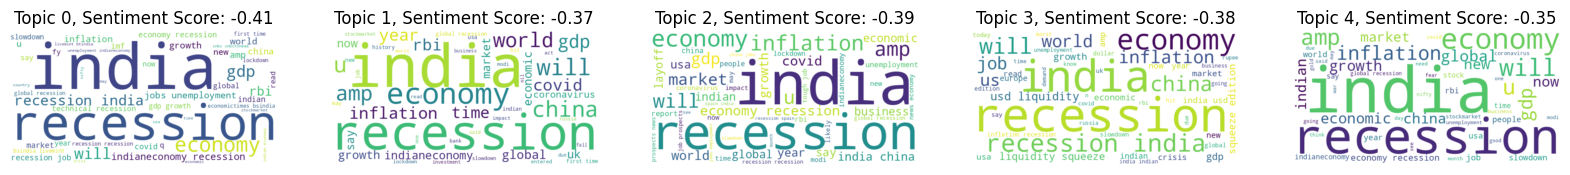

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the data
df = pd.read_csv('recession_2023_data.csv')

# Preprocess the data
df['clean_text'] = df['content'].str.replace('[^a-zA-Z\s]', '').str.lower()

# Create the document term matrix using TfidfVectorizer
vocab = {}
for idx, text in enumerate(df['clean_text']):
    for word in text.split():
        if word not in vocab:
            vocab[word] = len(vocab)
vectorizer = TfidfVectorizer(vocabulary=vocab, max_df=0.5, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['clean_text'])

# Apply LDA
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for Topic {i}")
    print([list(vocab.keys())[index] for index in topic.argsort()[-10:]])
    print('\n')

# Perform sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Calculate topic sentiment score
topic_sentiments = []
for i in range(5):
    topic_tweets = df.loc[lda.transform(doc_term_matrix).argmax(axis=1) == i]['clean_text']
    if len(topic_tweets) > 0:
        avg_sentiment = topic_tweets.apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    else:
        avg_sentiment = 0
    topic_sentiments.append(avg_sentiment)

# Print the average sentiment score for each topic
for i, avg_sentiment in enumerate(topic_sentiments):
    print("Topic {}: Average sentiment score = {:.2f}".format(i, avg_sentiment))

# Visualize the topics and sentiment scores using a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(20,10))
for i in range(5):
    wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
    wc.generate(' '.join(df.loc[lda.transform(doc_term_matrix).argmax(axis=1) == i]['clean_text']))
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Topic {i}, Sentiment Score: {topic_sentiments[i]:.2f}")

plt.show()



In [19]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Loading the data
df = pd.read_csv('recession_2023_data.csv')

# Preprocessing the data
df['clean_text'] = df['content'].str.replace('[^a-zA-Z\s]', '').str.lower()

# Creating the document term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=2)
doc_term_matrix = vectorizer.fit_transform(df['clean_text'])

# Checking the terms that are present in the Bag of Words
vocabulary = vectorizer.vocabulary_
print("Printing some of the terms that are present in the Bag of Words")
print(list(vocabulary.keys())[0:10])


<ipython-input-19-e59e09655acd>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['content'].str.replace('[^a-zA-Z\s]', '').str.lower()


Printing some of the terms that are present in the Bag of Words
['elonmusk', 'begins', 'hiring', 'twitter', 'firing', 'nearly', 'employees', 'reveals', 'future', 'plans']


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

# Fit and transform the data
tfidf = vectorizer.fit_transform(df['clean_text'])

# Create KMeans object with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans model to data
kmeans.fit(tfidf)

# Print the top 10 terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.vocabulary_
for i in range(n_clusters):
    print(f"Top 10 terms for cluster {i}:")
    for j in order_centroids[i, :10]:
        print(' %s' % list(terms.keys())[list(terms.values()).index(j)])
    print()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top 10 terms for cluster 0:
 economy
 rbi
 indias
 inflation
 global
 technical
 indian
 time
 indianeconomy
 slowdown

Top 10 terms for cluster 1:
 inflation
 amp
 jobs
 global
 economic
 economy
 unemployment
 world
 covid
 indias

Top 10 terms for cluster 2:
 edition
 squeeze
 usd
 liquidity
 gfc
 shadowbanks
 pmi
 banks
 inr
 emergingmarkets

Top 10 terms for cluster 3:
 gdp
 growth
 indias
 economy
 indianeconomy
 fy
 quarter
 imf
 contract
 rbi

Top 10 terms for cluster 4:
 china
 economy
 russia
 japan
 bric
 covid
 usa
 brazil
 world
 spain



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Add topic_id column to dataframe
df['topic_id'] = lda.transform(doc_term_matrix).argmax(axis=1)

# Split data into train and test sets
X = doc_term_matrix
y = df['topic_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


ValueError: ignored

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to assign sentiment to each tweet
def get_sentiment(tweet):
    sentiment = sia.polarity_scores(tweet)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Add a sentiment column to the dataframe
df['sentiment'] = df['content'].apply(get_sentiment)
print(df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into numerical data using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_cv, y_train)

# Evaluate the classifier on the test set
y_pred = rfc.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test, y_pred))


                           date                   id  \
0     2022-11-30 04:17:49+00:00  1597807084934172672   
1     2022-11-30 02:48:10+00:00  1597784522728558592   
2     2022-11-29 17:21:57+00:00  1597642029479038976   
3     2022-11-29 11:40:40+00:00  1597556142213070850   
4     2022-11-29 10:12:57+00:00  1597534071202385922   
...                         ...                  ...   
5171  2009-03-16 11:32:55+00:00           1335812277   
5172  2009-03-03 18:06:09+00:00           1274780157   
5173  2009-02-26 03:51:33+00:00           1252271774   
5174  2009-02-02 16:26:53+00:00           1170205890   
5175  2009-01-14 11:30:24+00:00           1118044049   

                                                content         username  \
0     📌 @elonmusk begins hiring for Twitter 2.0 afte...  workflexitweets   
1     Global Recession से दुनिया हुई बेहाल, लेकिन In...        indilinks   
2     Will global recession impact India or not? #re...     BizzBuzzNews   
3     Is Recession In I

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert sentiment labels to numerical values (0=negative, 1=neutral, 2=positive)
df['sentiment_id'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Split data into train and test sets
X = doc_term_matrix
y = df['sentiment_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6534749034749034


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



# Assign sentiment labels
df['sentiment'] = df['content'].apply(get_sentiment)

# Split data into train and test sets
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train an SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)

# Evaluate the classifier on the test set
y_pred = svm.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6795366795366795


In [28]:

  import nltk
  nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('recession_2023_data.csv')

# Create a sentiment analyzer object
sia = SentimentIntensityAnalyzer()

# Assign sentiment scores to each tweet
df['sentiment_score'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert the sentiment scores to positive, negative, or neutral labels
df['sentiment'] = pd.cut(df['sentiment_score'], bins=3, labels=['negative', 'neutral', 'positive'])

# Split the data into training and testing sets
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features using TfidfVectorizer with n-grams and part-of-speech tags
tfidf = TfidfVectorizer(ngram_range=(1, 2), tokenizer=nltk.word_tokenize, max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Oversample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_tfidf_oversampled, y_train_oversampled = ros.fit_resample(X_train_tfidf, y_train)

# Fine-tune hyperparameters using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, verbose=2)
grid_search.fit(X_train_tfidf_oversampled, y_train_oversampled)
best_params = grid_search.best_params_

# Train a logistic regression model with the best hyperparameters
lr = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], random_state=42)
lr.fit(X_train_tfidf_oversampled, y_train_oversampled)

# Evaluate the model on the testing set
y_pred = lr




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01, penalty=l2; total time=   0.2s
[CV] END .................................C=0.01, penalty=l2; total time=   0.2s
[CV] END .................................C=0.01, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01, penalty=l2; total time=   0.2s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................................C=10, penalty=l2; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................................C=10, penalty=l2; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................................C=10, penalty=l2; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................................C=10, penalty=l2; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................................C=10, penalty=l2; total time=   2.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=100, penalty=l2; total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback

[CV] END ..................................C=100, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 0.6611969111969112
              precision    recall  f1-score   support

    negative       0.63      0.63      0.63       299
     neutral       0.73      0.72      0.73       547
    positive       0.52      0.55      0.53       190

    accuracy                           0.66      1036
   macro avg       0.63      0.63      0.63      1036
weighted avg       0.66      0.66      0.66      1036



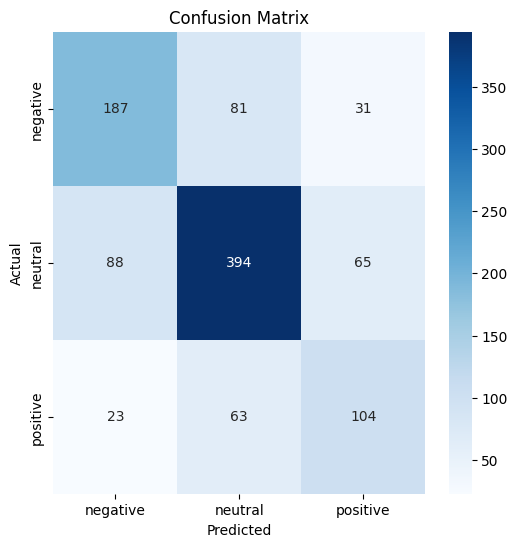

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the testing set
y_pred = lr.predict(X_test_tfidf)

# Calculate and print the accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
import pandas as pd
import numpy as np
from textblob import TextBlob

# Load the data
data = pd.read_csv('recession_2023_data.csv')

# Define a function to assign sentiment to the content
def get_sentiment(text):
    blob = TextBlob(text)
    return 'positive' if blob.sentiment.polarity > 0 else 'negative'

# Create a new column 'sentiment' to store the assigned sentiment
data['sentiment'] = data['content'].apply(get_sentiment)

# Save the data with the new column
data.to_csv('recession_2023_data_sentiment.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


# load the data
data = pd.read_csv('recession_2023_data_sentiment.csv')

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['sentiment'], test_size=0.2, random_state=42)

# preprocess the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# create the SVM model and perform grid search
svm_model = SVC(random_state=42)
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters for SVM:", svm_grid_search.best_params_)
print("Accuracy score for SVM:", svm_grid_search.best_score_)


Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy score for SVM: 0.7961352657004831


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# create the random forest model and perform grid search
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters for Random Forest:", rf_grid_search.best_params_)
print("Accuracy score for Random Forest:", rf_grid_search.best_score_)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# create the gradient boosting model and perform grid search
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Accuracy score for Gradient Boosting:", gb_grid_search.best_score_)



In [ ]:
print(y_pred)

LogisticRegression(C=100, random_state=42)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(corpus)

[[(0, 1)]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 34.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
!pip install nltk
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize the sentiment analyzers
sid = SentimentIntensityAnalyzer()

# Load the topics generated by the LDA model
topics = [
    ['economic', '2', '#recession?', 'could', 'industry', 'last', 'recession.', '@nsitharaman', '#india.', '#money', 'brazil,', '4', 'sales', 'deep', 'looking'],
    ['#jobs', 'dont', '@economictimes', '#bric', 'soon', '#unemployment', '@bt_india', 'indians', 'crore', 'pm', '#econ', '#automobile', '--', '#auto', '#narendramodi'],
    ['us', 'jobs', '.', ':', '#business', '#economicslowdown', '#coronavirus', 'facing', 'months', '#nigeria', 'impact', 'government', 'know', 'cut', 'high'],
    ['edition', '#liquidity', 'via', '#squeeze', '#rupee', '#canada', 'buy', '1', 'never', 'fear', 'want', '#dollar', 'rupee', '#currency', '#pmi'],
    ['#india', '#economy', '#recession', '#china', '#spain', 'prospects', "india's", '#us', 'like', '#slowdown', '#recession,', '|', '#indianeconomy', '#growth', 'blog'],
    ['#recession', 'india', 'recession', '-', '&amp;', 'global', 'job', 'economy', 'tough', 'growth', '...', 'indian', 'may', '&', '#gdp'],
    ['#news', '#employment', 'back', 'get', 'slowdown', '#it', 'go', 'reserve', '#oil', '#stockmarket', '#politics', 'biggest', 'low', 'also', '#supply'],
    ['rt', 'car', 'hit', '$usd', '#indian', '#finance', 'even', 'help', 'big', '#consulting', 'country', '#job', '#realestate', 'changing', 'hits']
]

# Loop through each topic and calculate its sentiment score using VADER and TextBlob
for i, topic in enumerate(topics):
    # Calculate the sentiment using VADER
    sid_sentiment = sid.polarity_scores(' '.join(topic))['compound']
    
    # Calculate the sentiment using TextBlob
    tb_sentiment = TextBlob(' '.join(topic)).sentiment.polarity
    
    # Classify the sentiment as positive, negative, or neutral for both VADER and TextBlob
    sid_sentiment_class = 'positive' if sid_sentiment > 0 else 'negative' if sid_sentiment < 0 else 'neutral'
    tb_sentiment_class = 'positive' if tb_sentiment > 0 else 'negative' if tb_sentiment < 0 else 'neutral'
    
    # Print the results for each topic
    print(f"Topic {i+1}: VADER {sid_sentiment_class} ({sid_sentiment:.4f}), TextBlob {tb_sentiment_class} ({tb_sentiment:.4f})")


Topic 1: VADER negative (-0.4215), TextBlob positive (0.0667)
Topic 2: VADER neutral (0.0000), TextBlob neutral (0.0000)
Topic 3: VADER negative (-0.2732), TextBlob positive (0.1600)
Topic 4: VADER positive (0.3412), TextBlob neutral (0.0000)
Topic 5: VADER positive (0.5719), TextBlob neutral (0.0000)
Topic 6: VADER negative (-0.1779), TextBlob negative (-0.1944)
Topic 7: VADER negative (-0.2732), TextBlob neutral (0.0000)
Topic 8: VADER positive (0.4019), TextBlob neutral (0.0000)


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize the sentiment analyzers
sid = SentimentIntensityAnalyzer()

# Load the topics generated by the LDA model
topics = [
    ['economic', '2', '#recession?', 'could', 'industry', 'last', 'recession.', '@nsitharaman', '#india.', '#money', 'brazil,', '4', 'sales', 'deep', 'looking'],
    ['#jobs', 'dont', '@economictimes', '#bric', 'soon', '#unemployment', '@bt_india', 'indians', 'crore', 'pm', '#econ', '#automobile', '--', '#auto', '#narendramodi'],
    ['us', 'jobs', '.', ':', '#business', '#economicslowdown', '#coronavirus', 'facing', 'months', '#nigeria', 'impact', 'government', 'know', 'cut', 'high'],
    ['edition', '#liquidity', 'via', '#squeeze', '#rupee', '#canada', 'buy', '1', 'never', 'fear', 'want', '#dollar', 'rupee', '#currency', '#pmi'],
    ['#india', '#economy', '#recession', '#china', '#spain', 'prospects', "india's", '#us', 'like', '#slowdown', '#recession,', '|', '#indianeconomy', '#growth', 'blog'],
    ['#recession', 'india', 'recession', '-', '&amp;', 'global', 'job', 'economy', 'tough', 'growth', '...', 'indian', 'may', '&', '#gdp'],
    ['#news', '#employment', 'back', 'get', 'slowdown', '#it', 'go', 'reserve', '#oil', '#stockmarket', '#politics', 'biggest', 'low', 'also', '#supply'],
    ['rt', 'car', 'hit', '$usd', '#indian', '#finance', 'even', 'help', 'big', '#consulting', 'country', '#job', '#realestate', 'changing', 'hits']
]

# Loop through each topic and calculate its sentiment score using TextBlob and VADER
for i, topic in enumerate(topics):
    tb_total_sentiment = 0
    tb_num_words = 0
    sid_total_sentiment = 0
    sid_num_words = 0
    for word in topic:
        # Calculate the sentiment score of the word using TextBlob
        tb_sentiment_score = TextBlob(word).sentiment.polarity
        tb_total_sentiment += tb_sentiment_score
        if tb_sentiment_score != 0:
            tb_num_words += 1
        
        # Calculate the sentiment score of the word using VADER
        sid_sentiment_score = sid.polarity_scores(word)['compound']
        sid_total_sentiment += sid_sentiment_score
        if sid_sentiment_score != 0:
            sid_num_words += 1
            
    # Calculate the average sentiment score of the topic using TextBlob and VADER
    tb_avg_sentiment = tb_total_sentiment / tb_num_words if tb_num_words > 0 else 0
    sid_avg_sentiment = sid_total_sentiment / sid_num_words if sid_num_words > 0 else 0
    
    # Determine the sentiment class of the topic based on the average sentiment score
    tb_sentiment_class = 'positive' if tb_avg_sentiment > 0 else 'negative'


In [ ]:
import numpy as np
from scipy import stats

# Initialize the sentiment analyzers
sid = SentimentIntensityAnalyzer()

# Load the topics generated by the LDA model
topics = [
    ['economic', '2', '#recession?', 'could', 'industry', 'last', 'recession.', '@nsitharaman', '#india.', '#money', 'brazil,', '4', 'sales', 'deep', 'looking'],
    ['#jobs', 'dont', '@economictimes', '#bric', 'soon', '#unemployment', '@bt_india', 'indians', 'crore', 'pm', '#econ', '#automobile', '--', '#auto', '#narendramodi'],
    ['us', 'jobs', '.', ':', '#business', '#economicslowdown', '#coronavirus', 'facing', 'months', '#nigeria', 'impact', 'government', 'know', 'cut', 'high'],
    ['edition', '#liquidity', 'via', '#squeeze', '#rupee', '#canada', 'buy', '1', 'never', 'fear', 'want', '#dollar', 'rupee', '#currency', '#pmi'],
    ['#india', '#economy', '#recession', '#china', '#spain', 'prospects', "india's", '#us', 'like', '#slowdown', '#recession,', '|', '#indianeconomy', '#growth', 'blog'],
    ['#recession', 'india', 'recession', '-', '&amp;', 'global', 'job', 'economy', 'tough', 'growth', '...', 'indian', 'may', '&', '#gdp'],
    ['#news', '#employment', 'back', 'get', 'slowdown', '#it', 'go', 'reserve', '#oil', '#stockmarket', '#politics', 'biggest', 'low', 'also', '#supply'],
    ['rt', 'car', 'hit', '$usd', '#indian', '#finance', 'even', 'help', 'big', '#consulting', 'country', '#job', '#realestate', 'changing', 'hits']
]

# Calculate the sentiment scores of each word in each topic using TextBlob and VADER
tb_sentiments = []
sid_sentiments = []
for i, topic in enumerate(topics):
    tb_sentiments_topic = []
    sid_sentiments_topic = []
    for word in topic:
        # Calculate the sentiment score of the word using TextBlob
        tb_sentiment_score = TextBlob(word).sentiment.polarity
        tb_sentiments_topic.append(tb_sentiment_score)
        
        # Calculate the sentiment score of the word using VADER
        sid_sentiment_score = sid.polarity_scores(word)['compound']
        sid_sentiments_topic.append(sid_sentiment_score)
            
    tb_sentiments.append(tb_sentiments_topic)
    sid_sentiments.append(sid_sentiments_topic)
    
# Calculate the average sentiment scores of each topic using TextBlob and VADER
tb_avg_sentiments = np.mean(tb_sentiments, axis=1)
sid_avg_sentiments = np.mean(sid_sentiments, axis=1)

# Perform a t-test to determine whether there is a significant difference in sentiment scores between the two methods
t_statistic, p_value = stats.ttest_ind(tb_avg_sentiments, sid_avg_sentiments)

# Print the results
# Print the results
if p_value >= 0.05:
    print('There is no significant difference in sentiment scores between TextBlob and VADER.')
else:
    print('There is a significant difference in sentiment scores between TextBlob and VADER.')

There is no significant difference in sentiment scores between TextBlob and VADER.


In [ ]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
for index, row in df['content'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg > pos:
    df.loc[index, 'Sentiment'] = 'Negative'
  elif pos > neg:
    df.loc[index, 'Sentiment'] = 'Positive'
  else:
    df.loc[index, 'Sentiment'] = 'Neutral'
df.to_csv('sentiment_analysis_results.csv', index=False)

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('sentiment_analysis_results.csv')
# Preprocessing the text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['content'])
y = df['Sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluating the model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.6698841698841699
              precision    recall  f1-score   support

    Negative       0.63      0.72      0.67       415
     Neutral       0.70      0.70      0.70       312
    Positive       0.71      0.57      0.63       309

    accuracy                           0.67      1036
   macro avg       0.68      0.66      0.67      1036
weighted avg       0.67      0.67      0.67      1036



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data from the CSV file
df = pd.read_csv('sentiment_analysis_results.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a bag-of-words representation of the tweets
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Transform the bag-of-words representation to a tf-idf representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Train and evaluate the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

# Train and evaluate the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

# Train and evaluate the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print the results
print(f"Naive Bayes accuracy: {nb_accuracy}")
print(nb_report)
print(f"Logistic Regression accuracy: {lr_accuracy}")
print(lr_report)
print(f"Random Forest accuracy: {rf_accuracy}")
print(rf_report)


Naive Bayes accuracy: 0.5337837837837838
              precision    recall  f1-score   support

    Negative       0.46      0.95      0.62       415
     Neutral       0.93      0.36      0.52       312
    Positive       0.74      0.16      0.26       309

    accuracy                           0.53      1036
   macro avg       0.71      0.49      0.47      1036
weighted avg       0.68      0.53      0.48      1036

Logistic Regression accuracy: 0.6795366795366795
              precision    recall  f1-score   support

    Negative       0.62      0.77      0.69       415
     Neutral       0.75      0.69      0.72       312
    Positive       0.71      0.55      0.62       309

    accuracy                           0.68      1036
   macro avg       0.70      0.67      0.68      1036
weighted avg       0.69      0.68      0.68      1036

Random Forest accuracy: 0.6322393822393823
              precision    recall  f1-score   support

    Negative       0.57      0.80      0.66       

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['Sentiment'], test_size=0.2, random_state=42)

# Defining the TfidfVectorizer with default parameters
tfidf = TfidfVectorizer()

# Fit and transform the training set
X_train_tfidf = tfidf.fit_transform(X_train)

# Defining the LogisticRegression model
logreg = LogisticRegression(random_state=42)

# Defining the hyperparameters to be tuned
params = {'C': [0.01, 0.1, 1, 10],
          'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Printing the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Using the best model on the test set
X_test_tfidf = tfidf.transform(X_test)
y_pred = grid_search.predict(X_test_tfidf)

# Printing the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.69      0.74      0.72       415
     Neutral       0.72      0.74      0.73       312
    Positive       0.71      0.62      0.66       309

    accuracy                           0.71      1036
   macro avg       0.71      0.70      0.71      1036
weighted avg       0.71      0.71      0.71      1036



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# load the dataset
df = pd.read_csv('sentiment_analysis_results.csv')

# preprocess the text data
df['content'] = df['content'].str.lower()
df['content'] = df['content'].str.replace('[^\w\s]','')
df['content'] = df['content'].str.replace('\d+', '')
df['content'] = df['content'].str.replace('\n', '')
df['content'] = df['content'].str.strip()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['Sentiment'], test_size=0.2, random_state=42)

# convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the SVM classifier
clf = SVC(kernel='linear', C=1, gamma='auto')
clf.fit(X_train, y_train)

# evaluate the SVM classifier on the testing set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


<ipython-input-73-5cd14308d89f>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')
<ipython-input-73-5cd14308d89f>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('\d+', '')


              precision    recall  f1-score   support

    Negative       0.61      0.76      0.68       415
     Neutral       0.73      0.62      0.67       312
    Positive       0.68      0.56      0.62       309

    accuracy                           0.66      1036
   macro avg       0.68      0.65      0.66      1036
weighted avg       0.67      0.66      0.66      1036



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the SVM model with default hyperparameters
svm_model = SVC()

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.80      0.67       415
     Neutral       0.76      0.63      0.69       312
    Positive       0.71      0.47      0.57       309

    accuracy                           0.65      1036
   macro avg       0.68      0.63      0.64      1036
weighted avg       0.67      0.65      0.65      1036



In [ ]:
df = df.drop(['date','id', 'username', 'likeCount', 'retweetCount'], axis=1)
df.to_csv('sentiment_analysis_results.csv', index=False)
df

content Sentiment
0     📌 @elonmusk begins hiring for Twitter 2.0 afte...  Negative
1     Global Recession से दुनिया हुई बेहाल, लेकिन In...  Negative
2     Will global recession impact India or not? #re...  Negative
3     Is Recession In India Coming Soon?\n\nWant to ...  Negative
4     A report by #realestate data collation &amp; r...   Neutral
...                                                 ...       ...
5171  India beats recession blues, back on FDI radar...  Negative
5172  One lakh indian will return home to india in n...   Neutral
5173  Puneet doubts that any economy (BRIC or not) i...  Negative
5174  Wow! So many guys who did their MS in US are b...  Positive
5175  Indians abandoning their cars at #Dubai airpor...  Negative

[5176 rows x 2 columns]

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 2.5 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the topic modeling results
topic_weights = lda_model.transform(doc_term_matrix)
topic_weights = np.array(topic_weights)
topics = topic_weights.argmax(axis=1)
topics = topics.tolist()
df['Topic'] = topics

# Plot the topic distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Topic', data=df)
plt.title('Topic Distribution')
plt.show()

# Visualize the sentiment analysis results
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.show()

# Plot the sentiment scores for each topic
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Topic', y='topic_sentiment_score', data=df)
plt.title('Sentiment Score by Topic')
plt.show()

# Plot the sentiment scores for each sentiment label
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Sentiment', y='Sentiment_Score', data=df)
plt.title('Sentiment Score by Sentiment Label')
plt.show()

# Plot the heat map for topic-term distribution
plt.figure(figsize=(10,10))
sns.heatmap(lda_model.components_, cmap='viridis')
plt.title('Topic-Term Distribution')
plt.xlabel('Terms')
plt.ylabel('Topics')
plt.show()


NameError: ignored

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


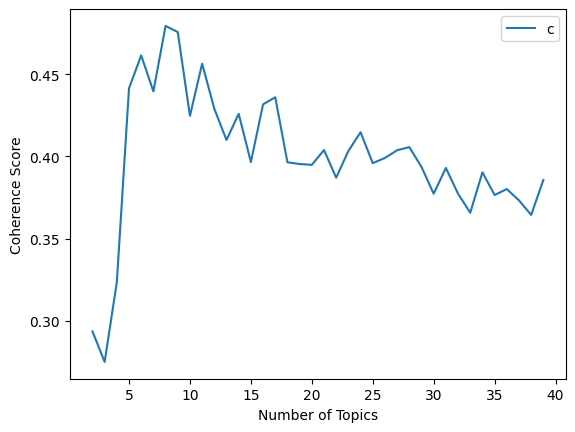

Coherence Score for 2 topics: 0.29344111074252
Coherence Score for 3 topics: 0.274837786254774
Coherence Score for 4 topics: 0.32332585275497017
Coherence Score for 5 topics: 0.44149165525000755
Coherence Score for 6 topics: 0.4615126739941397
Coherence Score for 7 topics: 0.4395691862942563
Coherence Score for 8 topics: 0.479462449077588
Coherence Score for 9 topics: 0.47571937624801613
Coherence Score for 10 topics: 0.4246779856837836
Coherence Score for 11 topics: 0.45647414709692274
Coherence Score for 12 topics: 0.42901899601152843
Coherence Score for 13 topics: 0.40999534281164185
Coherence Score for 14 topics: 0.425939725815449
Coherence Score for 15 topics: 0.3965610823707969
Coherence Score for 16 topics: 0.43169432237288186
Coherence Score for 17 topics: 0.4359967360675689
Coherence Score for 18 topics: 0.3964217846521199
Coherence Score for 19 topics: 0.3953652614465499
Coherence Score for 20 topics: 0.39484792901711063
Coherence Score for 21 topics: 0.40387131393502124
Cohe

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import gensim
import os
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('recession_2023_data.csv')

# Convert tweets to list
data = df['content'].tolist()

# Remove stopwords
stop_words = stopwords.words('english')
data = [[word for word in doc.lower().split() if word not in stop_words] for doc in data]

# Create dictionary
dictionary = gensim.corpora.Dictionary(data)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in data]

# Find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data, start=2, limit=40, step=1)

# Plot coherence score vs number of topics
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Coherence Score for {} topics: {}".format(m, cv))

# Find the optimal number of topics based on the coherence score
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_num_topics = range(start, limit, step)[optimal_model_index]
optimal_model = model_list[optimal_model_index]
print("Optimal Number of Topics: ", optimal_num_topics)

# Print top words for each topic
topics = optimal_model.show_topics(num_topics=-1, num_words=15, formatted=False)
for i, topic in enumerate(topics):
    print("Topic {}: {}".format(i, [word[0] for word in topic[1]]))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the topic modeling results
topic_weights = optimal_model[corpus]
topic_weights = np.array(topic_weights)
topics = topic_weights.argmax(axis=1)
topics = topics.tolist()
df['Topic'] = topics

# Plot the topic distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Topic', data=df)
plt.title('Topic Distribution')
plt.show()

# Visualize the sentiment analysis results
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.show()

# Plot the sentiment scores for each topic
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Topic', y='Sentiment_Score', data=df)
plt.title('Sentiment Score by Topic')
plt.show()

# Plot the sentiment scores for each sentiment label
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Sentiment', y='Sentiment_Score', data=df)
plt.title('Sentiment Score by Sentiment Label')
plt.show()

# Plot the heat map for topic-term distribution
plt.figure(figsize=(10,10))
sns.heatmap(optimal_model.show_topics(num_topics=-1, num_words=len(dictionary), formatted=False)[0][1], cmap='viridis')
plt.title('Topic-Term Distribution')
plt.xlabel('Terms')
plt.ylabel('Topics')
plt.show()


<ipython-input-3-78461a5859ed>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topic_weights = np.array(topic_weights)


TypeError: ignored

In [ ]:
import numpy as np





# Convert topic weights to integers
topic_weights = topic_weights.astype(int)

# Plot the topic distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Topic', data=df)
plt.title('Topic Distribution')
plt.show()

# Visualize the sentiment analysis results
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.show()

# Plot the sentiment scores for each topic
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Topic', y='Sentiment_Score', data=df)
plt.title('Sentiment Score by Topic')
plt.show()

# Plot the sentiment scores for each sentiment label
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Sentiment', y='Sentiment_Score', data=df)
plt.title('Sentiment Score by Sentiment Label')
plt.show()

# Plot the heat map for topic-term distribution
plt.figure(figsize=(10,10))
sns.heatmap(optimal_model.show_topics(num_topics=-1, num_words=len(dictionary), formatted=False)[0][1], cmap='viridis')
plt.title('Topic-Term Distribution')
plt.xlabel('Terms')
plt.ylabel('Topics')
plt.show()


ValueError: ignored

<Figure size 1000x500 with 0 Axes>

In [ ]:
print(topic_weights[0])
print(topic_weights[1])

[[2 0.051772963]
 [1 list([7])]
 [1 list([(7, 0.7323902)])]]
[[1 0.010774261]
 [18 list([5])]
 [18 list([(5, 0.99999326)])]]
